# Bank Project (Ensemble Method)

## Goal: 
### To Build a Model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

#### Bank Marketing
##### Abstract: 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

##### Data Set Information: 
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

##### Attribute Information:
###### Bank client data:
  1. Age (numeric)
  2. Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', '            technician', 'unemployed', 'unknown')
  3. Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
  4. Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
  5. Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
  6. Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
  7. Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
##### Related with the last contact of the current campaign:
  8. Contact: contact communication type (categorical: 'cellular','telephone')
  9. Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
  10. Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
  11. Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then                       y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input                   should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
##### Other attributes:
  12. Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13. Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously                      contacted
  14. Previous: number of contacts performed before this campaign and for this client (numeric)
  15. Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
##### Social and economic context attributes:
  16. Emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17. Cons.price.idx: consumer price index - monthly indicator (numeric)
  18. Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
  19. Euribor3m: euribor 3 month rate - daily indicator (numeric)
         ##### note: Euro Interbank Offer Rate(EurIBOR), is a reference rate that is constructed from the average interest rate at which eurozone banks offer unsecured short-                                         term lending on the inter-bank market.
  20. Nr.employed: number of employees - quarterly indicator (numeric)
##### Output variable (desired target):
y - has the client subscribed a term deposit? (binary: 'yes', 'no')

### Deliverable 1 (Exploratory Data Quality Report) & Deliverable 2 (Prepare the data for analytics) 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
#Loading the dataset and storing in dataframe
bank_df = pd.read_csv('bank-additional-full.csv', sep =';')

In [3]:
#Checking if the data is properly loaded..
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#Checking Width and Depth of the Data
bank_df.shape

(41188, 21)

In this dataset, there are 41118 Records and 21 Attributes

In [5]:
#Finding Datatypes of Each Attribute in the data
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

For building models, we need to handle the object type attributes. It will be taken care of by One Hot Encoding later. 

In [6]:
#Analysing the Class Counts on  basis of  target variable: 'y' i.e. if the Client had subscribed for term deposit..
bank_df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

###### Observation: 
Most of the Clients (36548) didnt opt for the Term Deposit Subscription. Only 4640 i.e. 11.27% of total clients availed th Term Deposit Subscription.

In [7]:
#Checking and Analysing Object Type Data 
bank_df.describe(include='object').transpose()

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [8]:
#Checking Unique Values in Categorical Columns:
print(bank_df['job'].unique())
print(bank_df['marital'].unique())
print(bank_df['education'].unique())
print(bank_df['housing'].unique())
print(bank_df['loan'].unique())
print(bank_df['contact'].unique())
print(bank_df['month'].unique())
print(bank_df['day_of_week'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']


###### Observation: Here, top indicates the most frequently occurred value in the specific column and next to 'top', the 'frequency' specifies number of times that value has repeatedly occurred in that column.
e.g. In job: out of 41188, 10422 are Admin 

In [9]:
#Checking and Analysing NUmerical Type Data 
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [10]:
#Checking for NUll Values in the dataframe..
bank_df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

The Dataset contains no null-values

no     36548
yes     4640
Name: y, dtype: int64

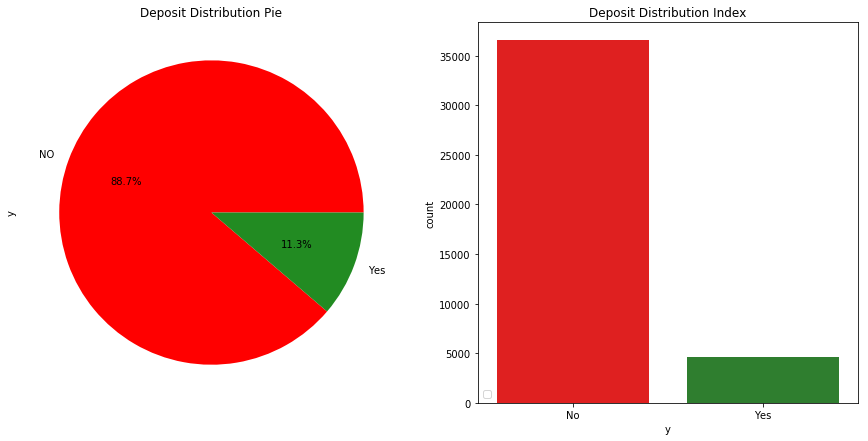

In [11]:
#Plotting Pie Chart and Count Plot for Term Deposit
figure,ax = plt.subplots(1,2,figsize=(15,7))
labels =['NO', 'Yes']
ax[0].set_title("Deposit Distribution Pie")
bank_df['y'].value_counts().plot.pie(ax = ax[0], labels =['NO', 'Yes'], autopct='%1.1f%%', colors = ['#FF0000', '#228B22'])
plt.title('Deposit Distribution Index')
plt.legend(labels,loc=3)
sns.countplot(bank_df['y'], ax = ax[1], palette = ['#FF0000', '#228B22'])
ax[1].set_xticklabels(['No','Yes'])
bank_df['y'].value_counts()

###### Observation: The last campaign wasnt much effective. Only 11.3%  clients opted for Term Deposits.

In [12]:
# Defining Features and Target:
feature = bank_df.drop(["y"],axis=1)
target = bank_df["y"]

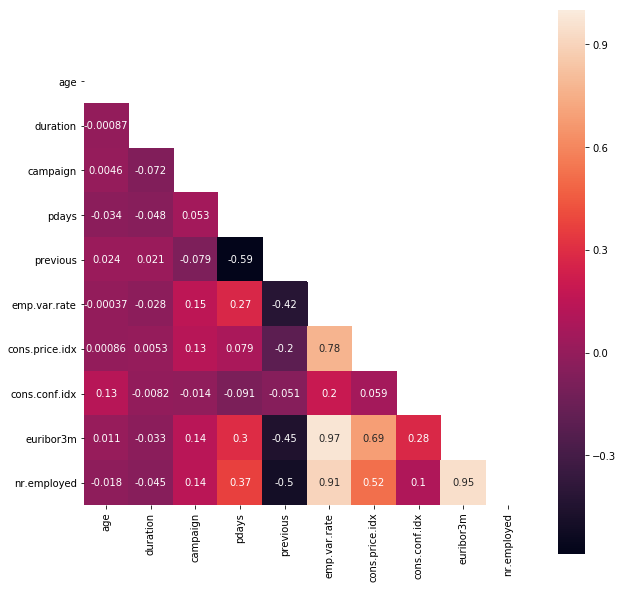

In [13]:
#Plotting Features HeatMap
corr = feature.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,annot=True,square=True)

Following Correlations are eminent from the Features HeatMap:
1. emp.var.rate and nr.employed are highly correlated. Its quite Obvious that no of Employees(nr.employees) will vary upon the the variance in employment rate(emp.var.rate)
2. euribor3m and nr.employed shows positive correlation
3. cons.price. index( It is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care) and euribor3m( interest rate) is fairly correlated.

### Analysing Numerical Attributes-

###### Studying Distribution of Age Attribute:

Age:
   * Average age of the people in the dataset is 38 with std of 10.42
   * Min. age is 17
   * Max. age is 98
   * quantile 75%(percentile) refers that 75 percentage of the people have 47 or less  age.
   * As 98 is max, there is great chance that its a outlier. (Anything greater than 69.5 is outlier)

In [14]:
#Finding minimum and maximum value in 'age' attribute:
print('Min age: ', bank_df['age'].max())
print('Max age: ', bank_df['age'].min())

Min age:  98
Max age:  17


Text(0, 0.5, 'Count')

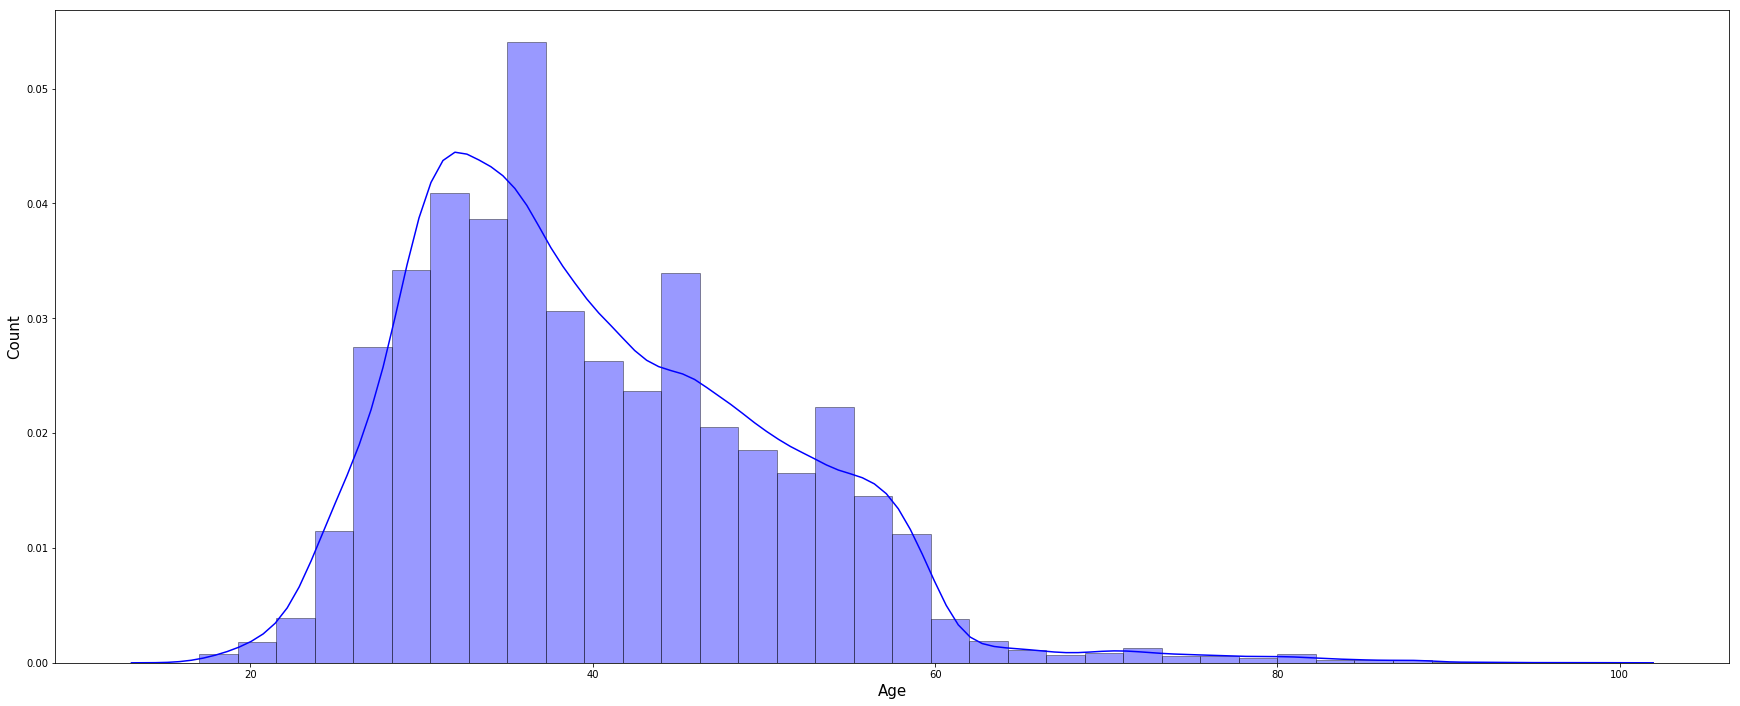

In [15]:
#Plotting Dist Plot of Age Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(bank_df['age'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

###### Observation: it can be seen that data in  age attribute is not normally distributed. It is skewed. Outliers need to be handled

In [16]:
# Handling Outliers using IQR method
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    print('IQR lower bound and upper bound are', fence_low, 'and', fence_high, 'respectively')
    return df_out
bank2 = remove_outlier(bank_df, 'age')

IQR lower bound and upper bound are 9.5 and 69.5 respectively


In [17]:
#function to creat group of ages, this helps because we have 78 differente values here
bank2= bank2.copy()
def age(dataframe):
    q1 = dataframe['age'].quantile(0.25)
    q2 = dataframe['age'].quantile(0.50)
    q3 = dataframe['age'].quantile(0.75)
    dataframe.loc[(dataframe['age'] <= q1), 'age'] = 1
    dataframe.loc[(dataframe['age'] > q1) & (dataframe['age'] <= q2), 'age'] = 2
    dataframe.loc[(dataframe['age'] > q2) & (dataframe['age'] <= q3), 'age'] = 3
    dataframe.loc[(dataframe['age'] > q3), 'age'] = 4 
    print (q1, q2, q3)
    return dataframe
age(bank2);
print(print(bank2['age'].unique()))
bank2.head(10)

32.0 38.0 47.0
[4 2 3 1]
None


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,3,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,4,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,3,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
# Checking the distribution of Term Deposit in each age Group:
series_age_1 = bank2[bank2['age'] == 1]['y'].value_counts()
series_age_2 = bank2[bank2['age'] == 2]['y'].value_counts()
series_age_3 = bank2[bank2['age'] == 3]['y'].value_counts()
series_age_4 = bank2[bank2['age'] == 4]['y'].value_counts()

Total Number of Clients in Age Group1:  1    11176
Name: age, dtype: int64
Total Number of Clients in Age Group2:  2    9999
Name: age, dtype: int64
Total Number of Clients in Age Group3::  3    10140
Name: age, dtype: int64
Total Number of Clients in Age Group4:  4    9404
Name: age, dtype: int64


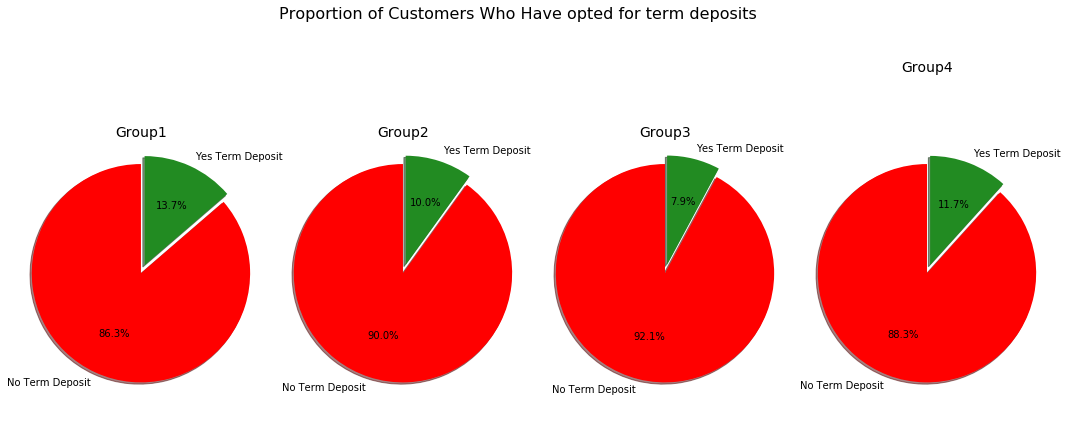

In [19]:
print('Total Number of Clients in Age Group1: ', bank2[bank2['age'] == 1]['age'].value_counts())
print('Total Number of Clients in Age Group2: ', bank2[bank2['age'] == 2]['age'].value_counts())
print('Total Number of Clients in Age Group3:: ', bank2[bank2['age'] == 3]['age'].value_counts())
print('Total Number of Clients in Age Group4: ', bank2[bank2['age'] == 4]['age'].value_counts())
labels = ['No Term Deposit','Yes Term Deposit']
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (18,6),subplot_kw=dict(aspect="equal"))
plt.axis('equal')
ax1.pie(series_age_1, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90, colors = ['#FF0000', '#228B22'])
ax1.set_title('Group1',fontsize = 14, y = 1.1)

ax2.pie(series_age_2, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90, colors = ['#FF0000', '#228B22'])
ax2.set_title('Group2', fontsize = 14, y = 1.1)

ax3.pie(series_age_3, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90, colors = ['#FF0000', '#228B22']);
ax3.set_title('Group3',fontsize = 14, y = 1.1)

ax4.pie(series_age_4, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90, colors = ['#FF0000', '#228B22']);
ax4.set_title('Group4',fontsize = 14, y = 1.1)

plt.suptitle('Proportion of Customers Who Have opted for term deposits' , fontsize = 16, y = 1.12);

###### Clients from Age Group1 and Group4 are  more likely to avail Term Deposit Scheme as compared to Group2 and Group3. However there is also not much difference in Group1, Group2 and Group4 Term Deposit distributions and Group3 conversion rate is lowest when compared to rest 3 groups 

# -----------------------------------------------------------------------------------------------------------------------------------------
##### Duration Attribute-


duration: last contact duration, in seconds (numeric). 
	      Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). 
	      Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
	      Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


In [ ]:
Duration:
   * Average duration of the people speaking in the dataset is (approx)371 with std of 347, as standard deviation is quite huge it means that duration is wide spread across the dataset.
   * Min. duration is 2
   * Max. duration is 3881
   * quantile 75%(percentile) refers that 75 percentage of the people spoke for 496 seconds or less.
   * while comparing with 75% quantile, 3881 is a outlier data point.

In [20]:
#Finding minimum and maximum value in 'duration' attribute:
print('Min duration: ', bank_df['duration'].max())
print('Max duration: ', bank_df['duration'].min())

Min duration:  4918
Max duration:  0


Text(0, 0.5, 'Count')

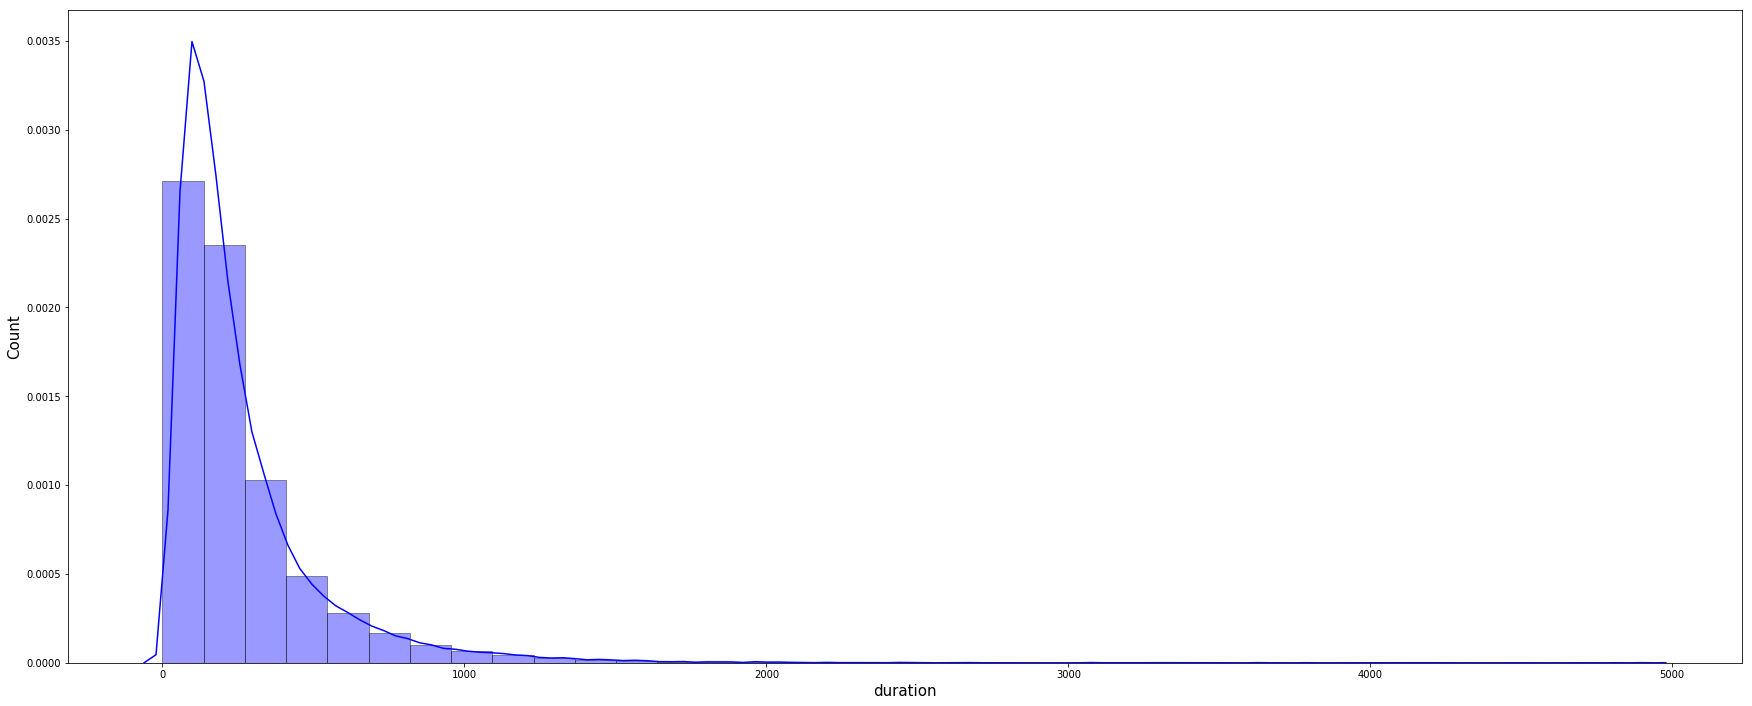

In [21]:
#Plotting Dist Plot of Age Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(bank_df['duration'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('duration', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

###### as with age, the data in duration attribute is largely Skewed. We need to Handle it

In [22]:
def remove_outlier_upper(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > 0) & (df_in[col_name] < fence_high)]
    print('IQR lower bound and upper bound are 0 and', fence_high, 'respectively')
    return df_out
bank2= remove_outlier_upper(bank2, 'duration')

IQR lower bound and upper bound are 0 and 644.5 respectively


In [23]:
#function to creat group of duration, this helps because we have got a lot of values
bank2= bank2.copy()
def duration(dataframe):
    q1 = dataframe['duration'].quantile(0.25)
    q2 = dataframe['duration'].quantile(0.50)
    q3 = dataframe['duration'].quantile(0.75)
    dataframe.loc[(dataframe['duration'] <= q1), 'duration'] = 1
    dataframe.loc[(dataframe['duration'] > q1) & (dataframe['duration'] <= q2), 'duration'] = 2
    dataframe.loc[(dataframe['duration'] > q2) & (dataframe['duration'] <= q3), 'duration'] = 3
    dataframe.loc[(dataframe['duration'] > q3), 'duration'] = 4 
    print (q1, q2, q3)
    return dataframe
duration(bank2)
print(print(bank2['duration'].unique()))

bank2['duration'].head(10)

97.0 166.0 277.0
[3 2 4 1]
None


0    3
1    2
2    3
3    2
4    4
5    3
6    2
7    3
8    4
9    1
Name: duration, dtype: int64

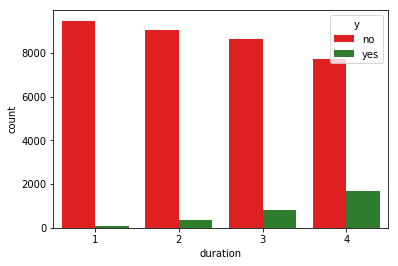

In [24]:
#Checking Distribution of Term Deposit over Duration
sns.countplot(x = 'duration', data = bank2, hue = 'y', palette = ['#FF0000', '#228B22'])

###### More the Customer is engaged in talks on the scheme, more interested he is. When the duration of call exceeds 600 seconds, the person is more likely to takeup the Term Deposit.

# -----------------------------------------------------------------------------------------------------------------------------------------

##### Campaign Attribute-  number of contacts performed during this campaign and for this client 


Campaign:
   * Average no. of contacts performed during the current campaign for a client in the dataset is (approx)2.56 with std of 2.77.
   * Min. no. of contcts performed is 1
   * Max.is 56
   * quantile 75%(percentile),for 75% of records, 3 times the client has been contacted in the current campaign for a client.
   * while comparing with 75% quantile, 56 is a outlier data point.
                              

In [25]:
# Checking values Distribution across the Campaign Attribute:
bank_df['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

###### Concentration of values beyond 6 is very poor. Data will be highly skewed 

Text(0, 0.5, 'Count')

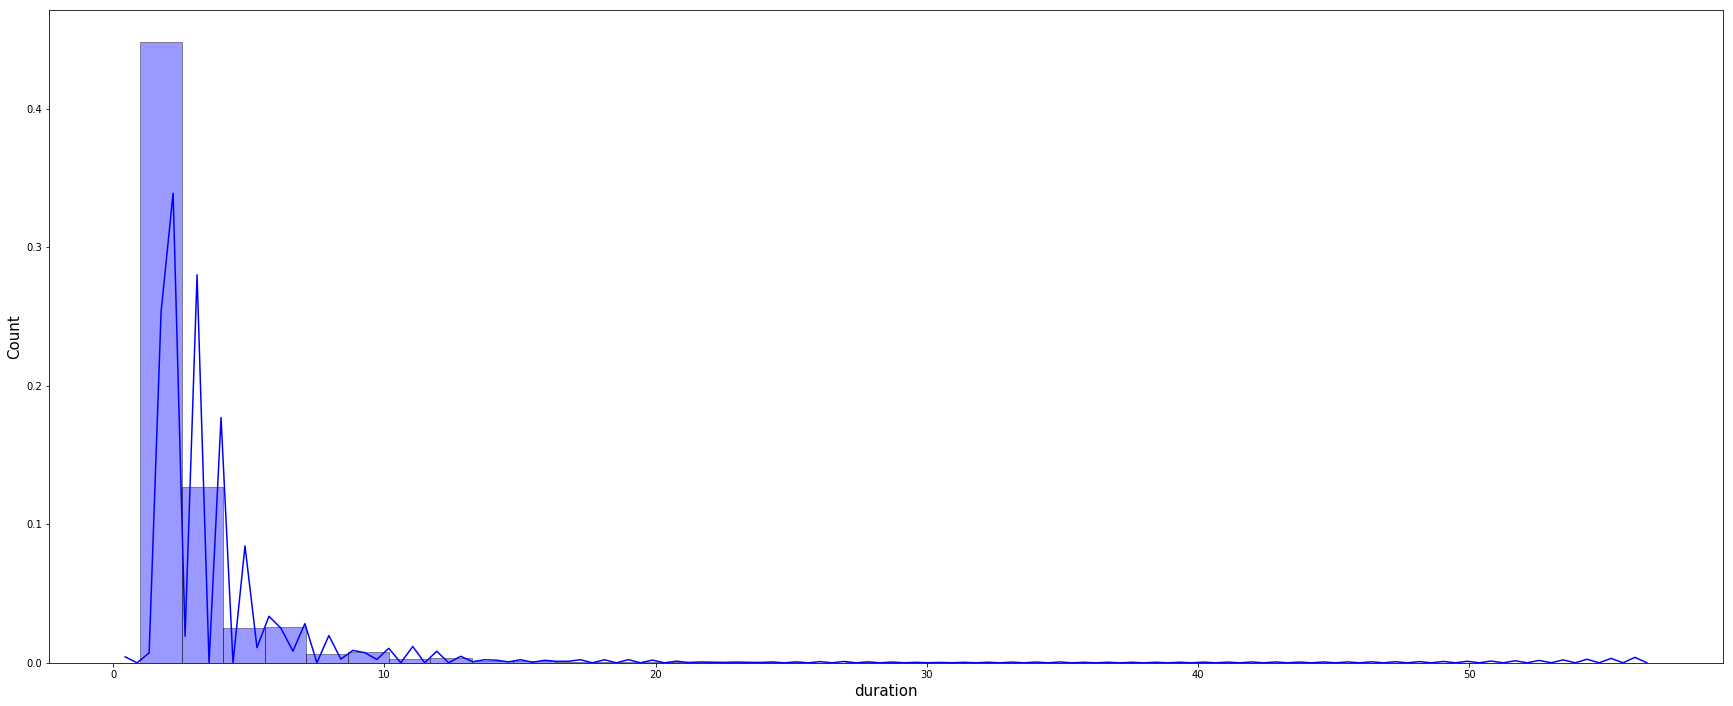

In [26]:
#Plotting Dist Plot of Age Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(bank_df['campaign'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('duration', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

###### Observation: It is clear that the data is highly skewed over this Campaign Attribute. We need to take of this

In [27]:
#Checking correlation between Campaign and Term Deposit Subscriptions(y)
pd.crosstab(bank_df['campaign'], bank_df['y'])

y,no,yes
campaign,,
1,15342,2300
2,9359,1211
3,4767,574
4,2402,249
5,1479,120
6,904,75
7,591,38
8,383,17
9,266,17


######  It is clear that frequency of Clients been called upon more than 6 times is very less. And the Term Deposit Aquisition  in thoses cases seem to be elusive and not at all concrete. Further, the data concentration across these points is very sparse. So I prefer to drop the Campaign values beyond '6' to make 'campaign' a better predictor.

In [28]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > 0) & (df_in[col_name] < fence_high)]
    print('IQR lower bound and upper bound are 0 and', fence_high, 'respectively')
    return df_out
bank2 = remove_outlier(bank2, 'campaign')

IQR lower bound and upper bound are 0 and 6.0 respectively


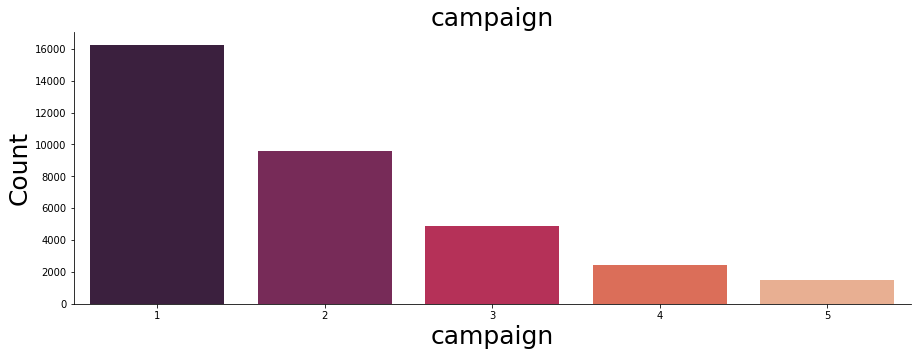

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'campaign',  palette="rocket", data = bank2)
ax.set_xlabel('campaign', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('campaign', fontsize=25)
sns.despine()

In [30]:
bank2['campaign'].value_counts()

1    16244
2     9591
3     4882
4     2421
5     1493
Name: campaign, dtype: int64

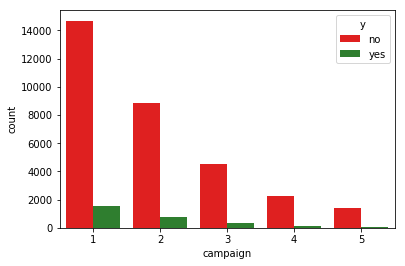

In [31]:
#How the frequency of calling a particular client effects the Terms Deposit in this campaign..
sns.countplot(x = 'campaign', data = bank2, hue = 'y', palette = ['#FF0000', '#228B22'])

##### It becomes hard to crack the client if frequency of Calls increases.

# -----------------------------------------------------------------------------------------------------------------------------------------

##### Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Pdays: (as from the given data)
   * Average no. of days passed after the client was contacted from previous campaign in the dataset is (approx)962.47 with std of 186.91
   * Min. pdays is 0
   * Max. pdays is 999
   * quantile 75%(percentile),for 75% of records it is 999 days
######  Here, 999 means client wa never contacted before. So these insights are misleading.

In [32]:
# Checking values Distribution across the Pdays Attribute:
bank_df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [33]:
bank2.loc[(bank2['pdays'] == 999), 'pdays'] = 0                             # it means person wasnt contacted before
bank2.loc[(bank2['pdays'] > 0) & (bank2['pdays'] <= 10), 'pdays'] = 1
bank2.loc[(bank2['pdays'] > 10) & (bank2['pdays'] <= 20), 'pdays'] = 2
bank2.loc[(bank2['pdays'] > 20) & (bank2['pdays'] != 999), 'pdays'] = 3 
bank2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Text(0, 0.5, 'Count')

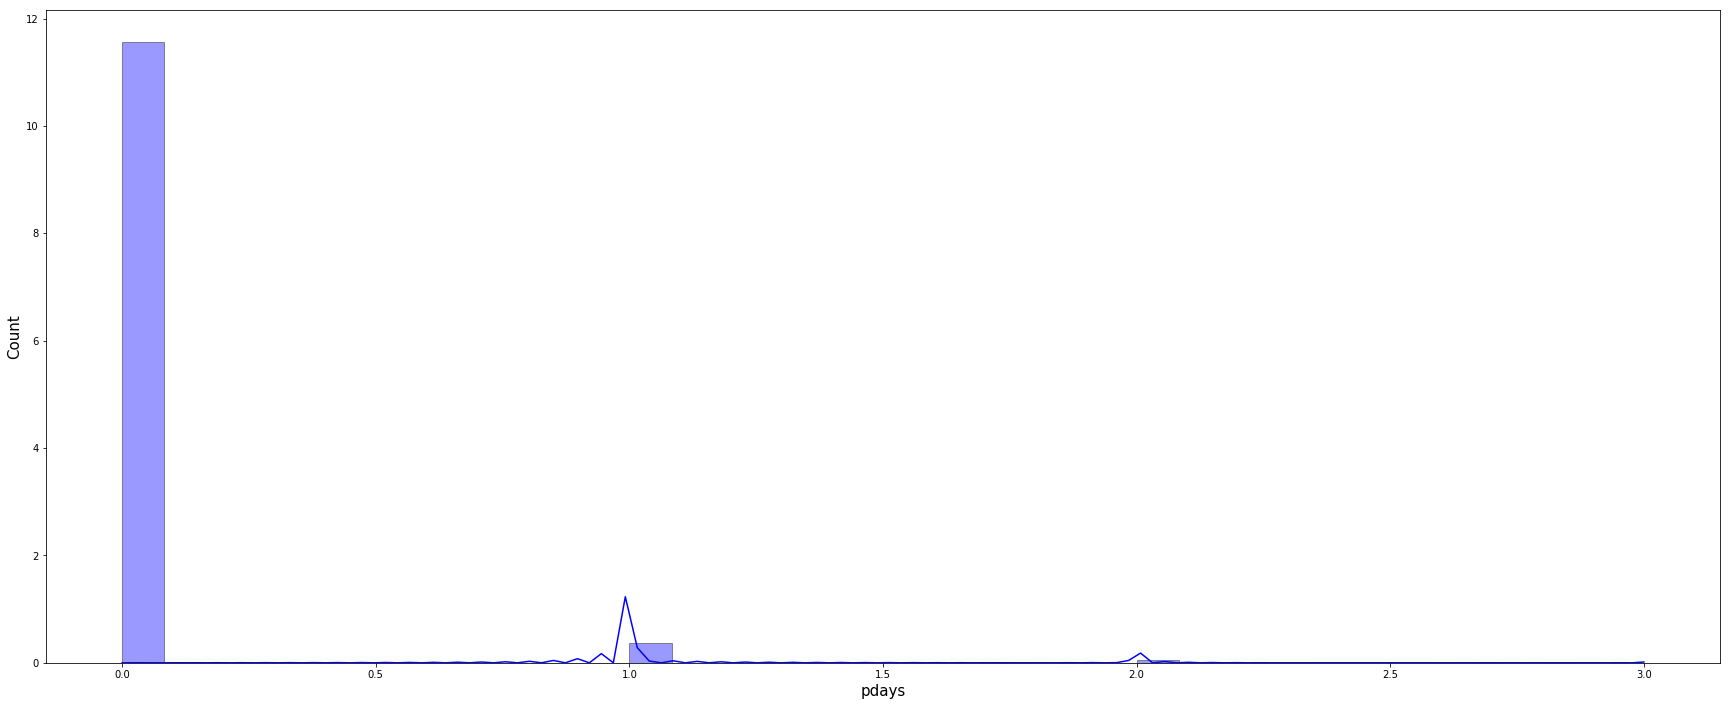

In [34]:
#Plotting Dist Plot of Age Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(bank2['pdays'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('pdays', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

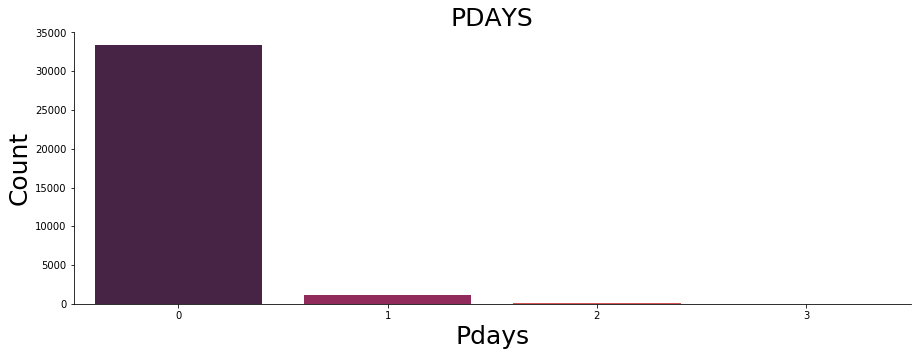

In [35]:
#Plotting Countplot of pdays for better understanding
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'pdays',  palette="rocket", data = bank2)
ax.set_xlabel('Pdays', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('PDAYS', fontsize=25)
sns.despine()

In [36]:
#Analysing Correlation between Pdasy and Term Deposit(y):
pd.crosstab(bank2['pdays'], bank2['y']).transpose()

pdays,0,1,2,3
y,,,,
no,31327,389,79,1
yes,2066,682,80,7


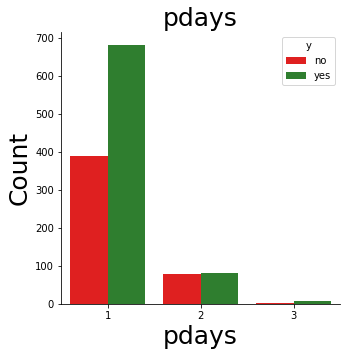

In [37]:
# Checking the impat on TermDeposit due to  the time lapse in days of contact
# ignoring the clients that were not previously called upon.
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

sns.countplot(x = bank2[bank2['pdays'] != 0]['pdays'], palette = ['#FF0000', '#228B22'],hue = 'y', data = bank2)
ax.set_xlabel('pdays', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('pdays', fontsize=25)
sns.despine()

###### Recently Contacted Customers are likely to avail Term Deposit Scheme. 

# -----------------------------------------------------------------------------------------------------------------------------------------

#### Previous: number of contacts performed before this campaign and for this client (numeric). It gives the Number of times a particular client was contacted 

###### Studying and Analysing the Previous Attribute -

Previous:
   * Average no. of contacts performed before this campaign for a client in the dataset is (approx)0.17 with std of 0.49.
   * Min. val is 0.000
   * Max. val is 7
   * quantile 75%(percentile),for 75% of records, 0 times the client has been contacted before this campaign.
   * while comparing with 75% quantile,7 is a outlier data point.
###### These resultsreflect that the new customers are considered priority over the existing ones

In [38]:
#Checking Unique Values in 'Previous' Attribute 
bank_df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

###### Bank Campaign focused more on new Clients. Hence there are 33002 records that were not previously contacted.

Text(0, 0.5, 'Count')

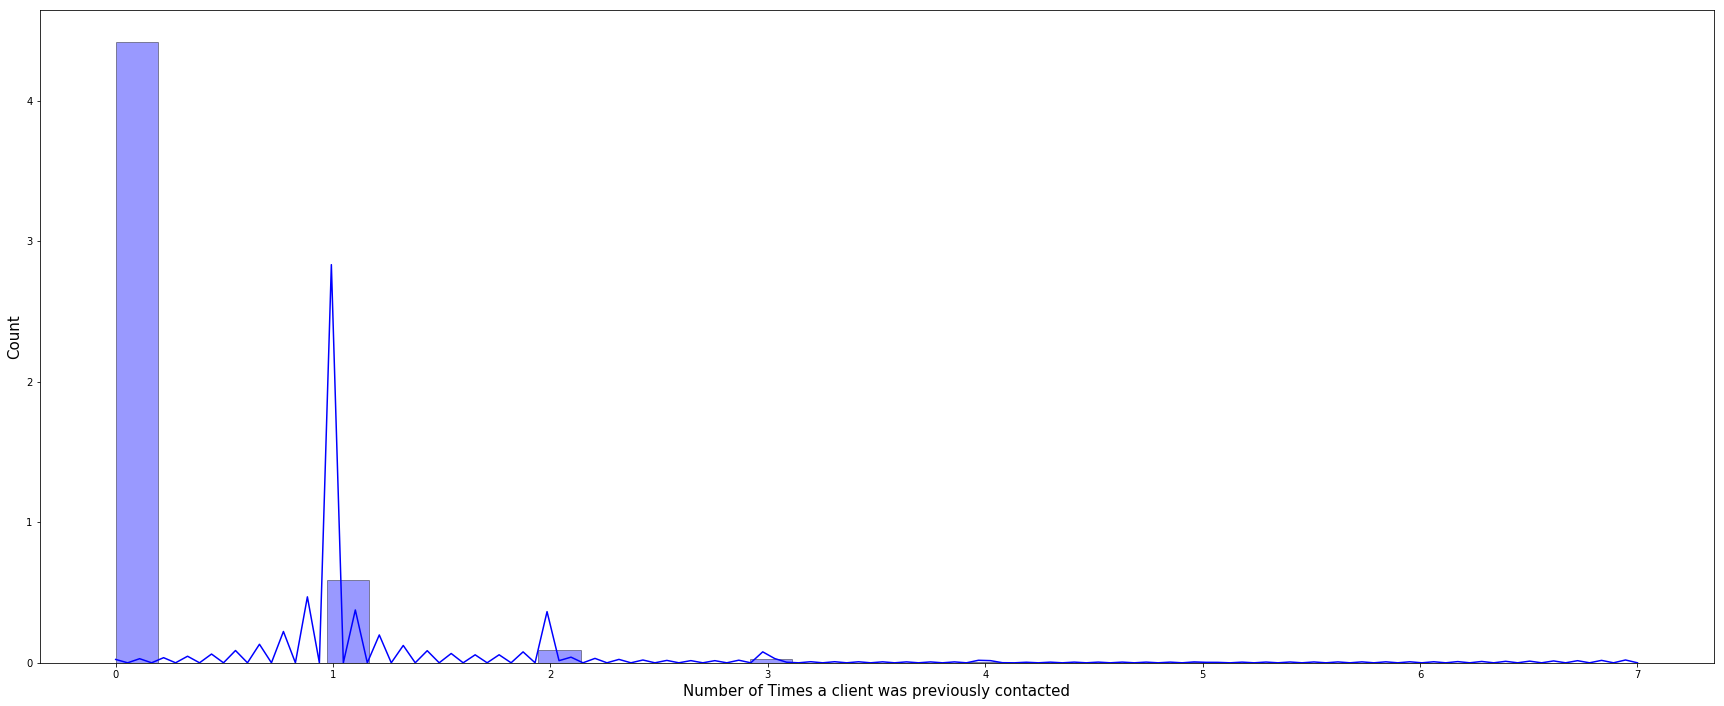

In [39]:
#Plotting Dist Plot of Age Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(bank2['previous'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('Number of Times a client was previously contacted', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

In [40]:
#Checking Distribution of Previous and Term Deposit(y)
pd.crosstab(bank2['previous'], bank_df['y']).transpose()

previous,0,1,2,3,4,5,6,7
y,,,,,,,,
no,28067,3267,354,74,27,4,2,1
yes,1698,721,270,104,28,12,2,0


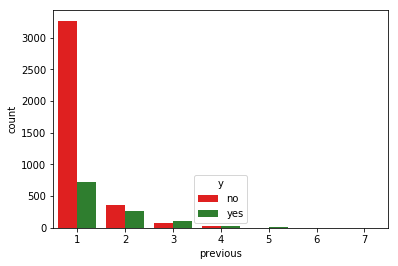

In [41]:
# Checking the impact of frequency of calls performed to lure client on TermDeposit 
# ignoring the clients that were not previously called upon.
sns.countplot(x = bank2[bank2['previous'] != 0]['previous'], data = bank2, hue = 'y', palette = ['#FF0000', '#228B22'])

###### As the frequency of calls to the particuar customer increases, he becomes less likely to accept the Term Deposit Scheme

# -----------------------------------------------------------------------------------------------------------------------------------------

#### Emp.var.rate: employment variation rate - quarterly indicator (numeric)

###### Studying and Analysing the Emp.var.rate  Attribute -

In [42]:
#Checking Unique Values in 'emp.var.rate' Attribute 
bank2['emp.var.rate'].value_counts()

 1.4    13125
-1.8     7854
 1.1     6707
-0.1     3310
-2.9     1479
-3.4      869
-1.7      625
-1.1      527
-3.0      125
-0.2       10
Name: emp.var.rate, dtype: int64

Text(0, 0.5, 'Count')

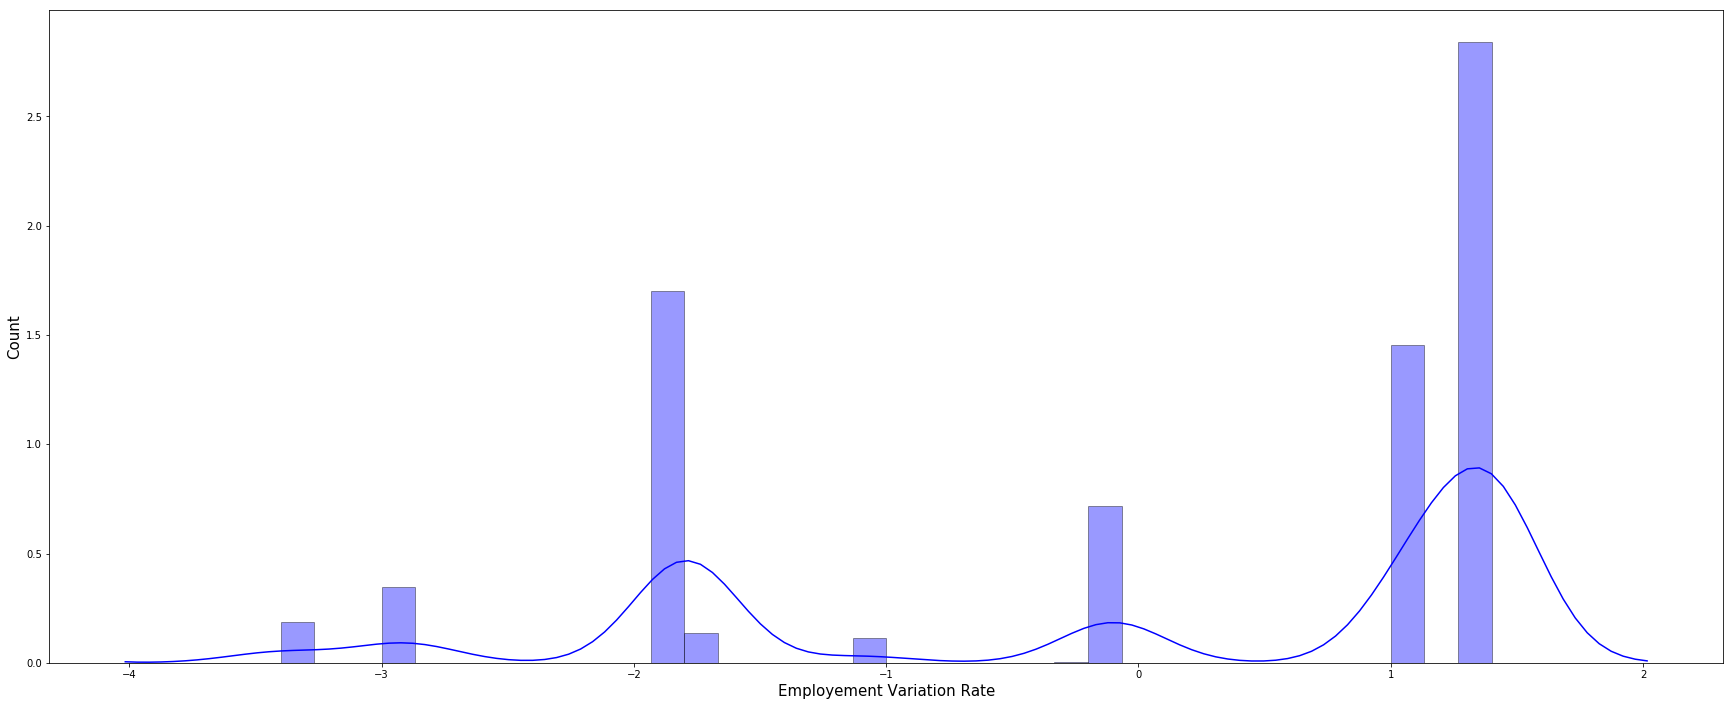

In [43]:
#Plotting Dist Plot of emp.var.rate Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(bank2['emp.var.rate'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('Employement Variation Rate', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

In [44]:
pd.crosstab(bank2['emp.var.rate'], bank2['y']).transpose()

emp.var.rate,-3.4,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4
y,,,,,,,,,,
no,512,62,976,6877,325,289,9,3192,6660,12894
yes,357,63,503,977,300,238,1,118,47,231


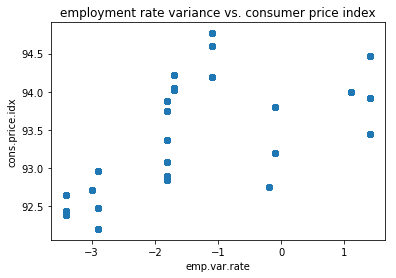

In [45]:
#emp var rate vs. cons price idx
plt.scatter(x = bank2['emp.var.rate'], y = bank2['cons.price.idx'] , alpha=0.5)
plt.title('employment rate variance vs. consumer price index')
plt.xlabel('emp.var.rate')
plt.ylabel('cons.price.idx')
plt.show()

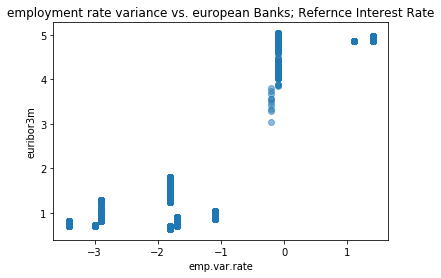

In [46]:
# emp var rate vs euribor
plt.scatter(x = bank2['emp.var.rate'], y = bank2['euribor3m'] , alpha=0.5)
plt.title('employment rate variance vs. european Banks; Refernce Interest Rate')
plt.xlabel('emp.var.rate')
plt.ylabel('euribor3m')
plt.show()

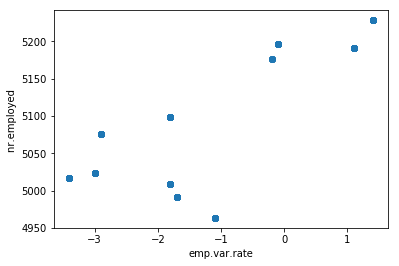

In [47]:
#emp var rate vs nr employed
plt.scatter(x = bank2['emp.var.rate'], y = bank2['nr.employed'] , alpha=0.5)
plt.xlabel('emp.var.rate')
plt.ylabel('nr.employed ')
plt.show()

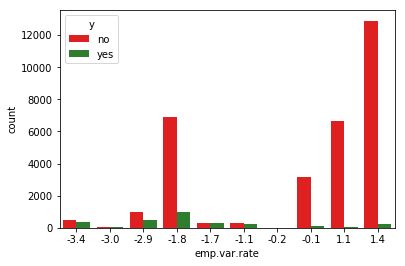

In [48]:
sns.countplot(x = 'emp.var.rate', data = bank2, hue = 'y', palette = ['#FF0000', '#228B22'] )

# -----------------------------------------------------------------------------------------------------------------------------------------

#### Cons.price.idx: consumer price index - monthly indicator (numeric)

###### Studying and Analysing the 'cons.price.idx  Attribute -

In [49]:
#Checking Unique Values in 'cons.price.idx' Attribute 
bank2['cons.price.idx'].value_counts()

93.994    6707
93.918    5282
92.893    4957
93.444    4334
94.465    3509
93.200    3249
93.075    2143
92.963     663
92.201     662
92.431     357
92.649     297
94.215     242
94.199     240
93.369     231
92.843     229
92.379     215
94.055     192
94.027     191
94.601     173
93.876     166
92.469     154
93.749     128
92.713     125
94.767     114
93.798      61
92.756      10
Name: cons.price.idx, dtype: int64

Text(0, 0.5, 'Count')

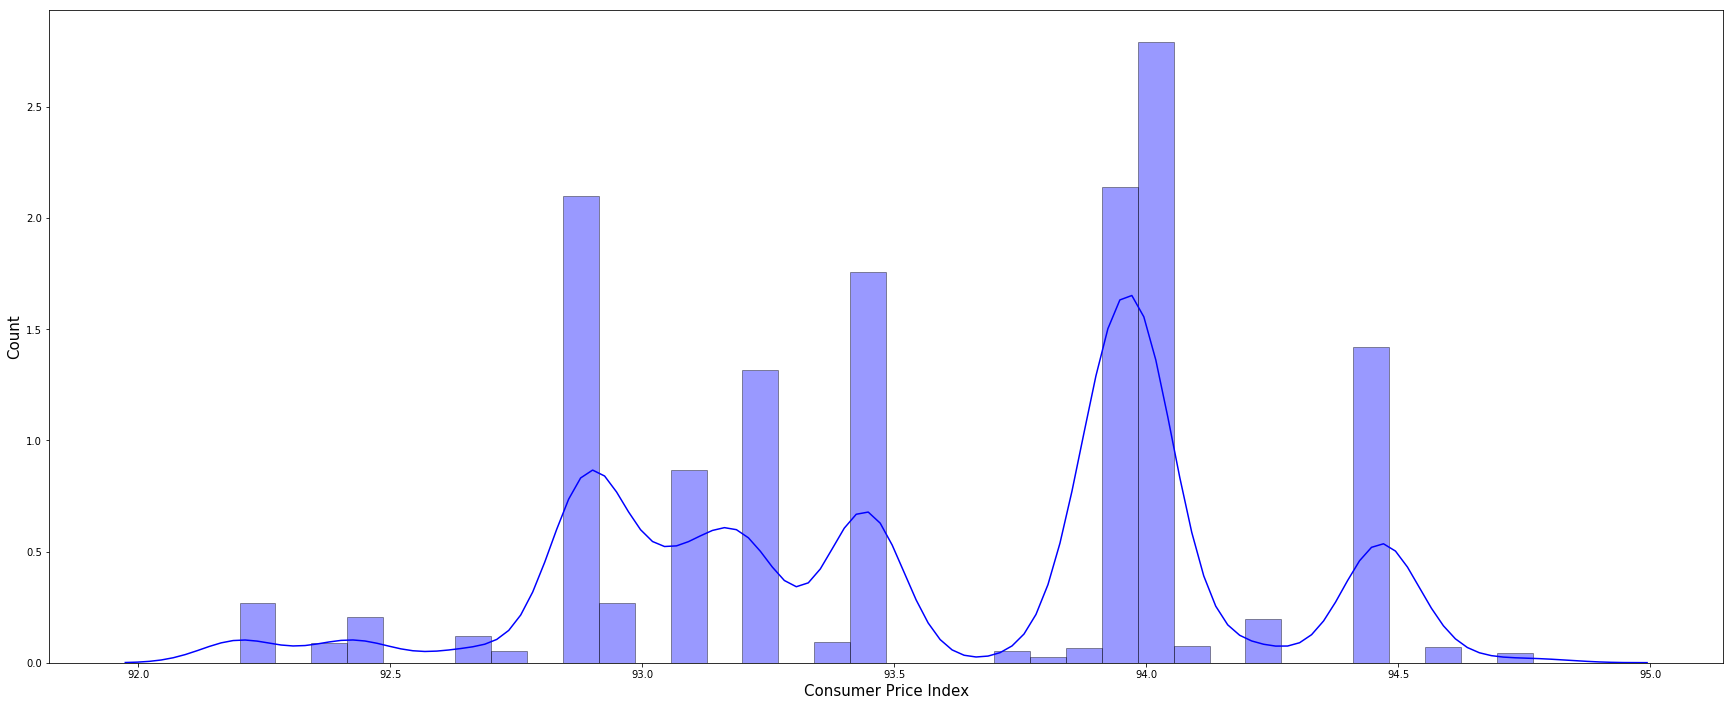

In [50]:
#Plotting Dist Plot of cons.price.idx Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(bank2['cons.price.idx'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('Consumer Price Index', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

In [51]:
pd.crosstab(bank2['cons.price.idx'], bank_df['y']).transpose()

cons.price.idx,92.20100000000001,92.37899999999999,92.431,92.469,92.649,92.713,92.756,92.84299999999999,92.89299999999999,92.963,...,93.876,93.91799999999999,93.994,94.027,94.055,94.199,94.215,94.465,94.601,94.76700000000001
y,,,,,,,,,,,,,,,,,,,,,
no,447,132,214,98,166,62,9,124,4692,431,...,71,5181,6660,96,114,125,115,3464,97,67
yes,215,83,143,56,131,63,1,105,265,232,...,95,101,47,95,78,115,127,45,76,47


# -----------------------------------------------------------------------------------------------------------------------------------------

#### Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

###### Studying and Analysing the 'Cons.conf.idx' Attribute -

In [52]:
#Checking Unique Values in 'cons..conf.idx' Attribute 
bank2['cons.conf.idx'].value_counts()

-36.4    6707
-42.7    5282
-46.2    4957
-36.1    4334
-41.8    3509
-42.0    3249
-47.1    2143
-40.8     663
-31.4     662
-26.9     357
-30.1     297
-40.3     242
-37.5     240
-34.8     231
-50.0     229
-29.8     215
-39.8     192
-38.3     191
-49.5     173
-40.0     166
-33.6     154
-34.6     128
-33.0     125
-50.8     114
-40.4      61
-45.9      10
Name: cons.conf.idx, dtype: int64

Text(0, 0.5, 'Count')

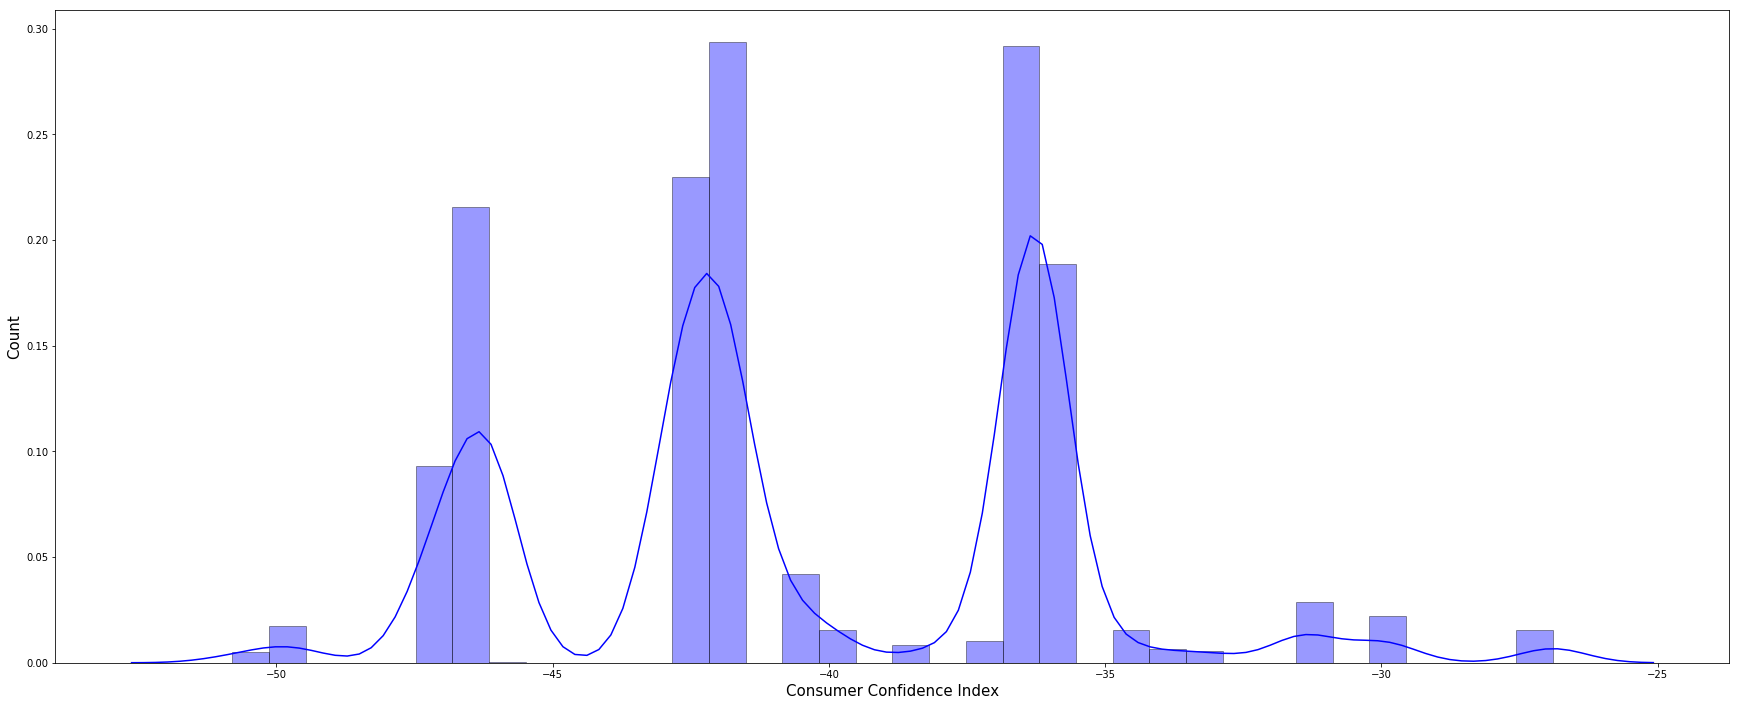

In [53]:
#Plotting Dist Plot of 'cons.conf.idx' Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(bank2['cons.conf.idx'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('Consumer Confidence Index', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

In [54]:
pd.crosstab(bank2['cons.conf.idx'], bank2['y']).transpose()

cons.conf.idx,-50.8,-50.0,-49.5,-47.1,-46.2,-45.9,-42.7,-42.0,-41.8,-40.8,...,-36.4,-36.1,-34.8,-34.6,-33.6,-33.0,-31.4,-30.1,-29.8,-26.9
y,,,,,,,,,,,,,,,,,,,,,
no,67,124,97,1829,4692,9,5181,3170,3464,431,...,6660,4249,101,60,98,62,447,166,132,214
yes,47,105,76,314,265,1,101,79,45,232,...,47,85,130,68,56,63,215,131,83,143


# -----------------------------------------------------------------------------------------------------------------------------------------
##### Euribor3m: euribor 3 month rate - daily indicator (numeric)
      
###### note: Euro Interbank Offer Rate(EurIBOR), is a reference rate that is constructed from the average interest rate at which eurozone banks offer unsecured short- term lending on the inter-bank market.

###### Studying and Analysing the Euribor3m:' Attribute -

In [55]:
#Checking Unique Values in ''euribor3m'' Attribute 
bank2['euribor3m'].value_counts()

4.857    2553
4.963    2044
4.962    2038
4.961    1522
4.856    1050
1.405    1035
4.964     985
4.965     893
4.864     826
4.960     822
4.855     773
4.968     770
4.860     728
4.076     718
1.266     690
4.120     677
4.153     652
4.859     651
4.959     643
4.858     605
4.191     574
4.021     569
4.967     567
4.966     548
1.281     547
1.327     483
4.958     468
1.299     461
1.291     460
1.250     445
         ... 
0.894       2
0.690       2
1.778       2
0.993       2
0.688       2
0.979       2
0.953       2
0.891       2
0.762       2
0.927       2
0.921       2
3.879       2
4.733       2
1.047       1
3.329       1
3.743       1
0.956       1
3.428       1
3.901       1
3.853       1
0.996       1
3.816       1
3.053       1
0.969       1
3.488       1
0.749       1
3.669       1
1.574       1
3.282       1
1.045       1
Name: euribor3m, Length: 314, dtype: int64

In [56]:
#Feature Engineering to predict better results
bank2.loc[(bank2['euribor3m'] < 1), 'euribor3m'] = 1
bank2.loc[(bank2['euribor3m'] > 1) & (bank2['euribor3m'] <= 2), 'euribor3m'] = 2
bank2.loc[(bank2['euribor3m'] > 2) & (bank2['euribor3m'] <= 3), 'euribor3m'] = 3
bank2.loc[(bank2['euribor3m'] > 3) & (bank2['euribor3m'] <= 4), 'euribor3m'] = 4
bank2.loc[(bank2['euribor3m'] > 4), 'euribor3m'] = 5
bank2.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
1,4,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
2,2,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
4,4,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
5,3,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
6,4,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
7,3,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
8,1,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
9,1,services,single,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no


In [57]:
bank2['euribor3m'].value_counts()

5.0    23138
2.0     8296
1.0     3183
4.0       14
Name: euribor3m, dtype: int64

Text(0, 0.5, 'Count')

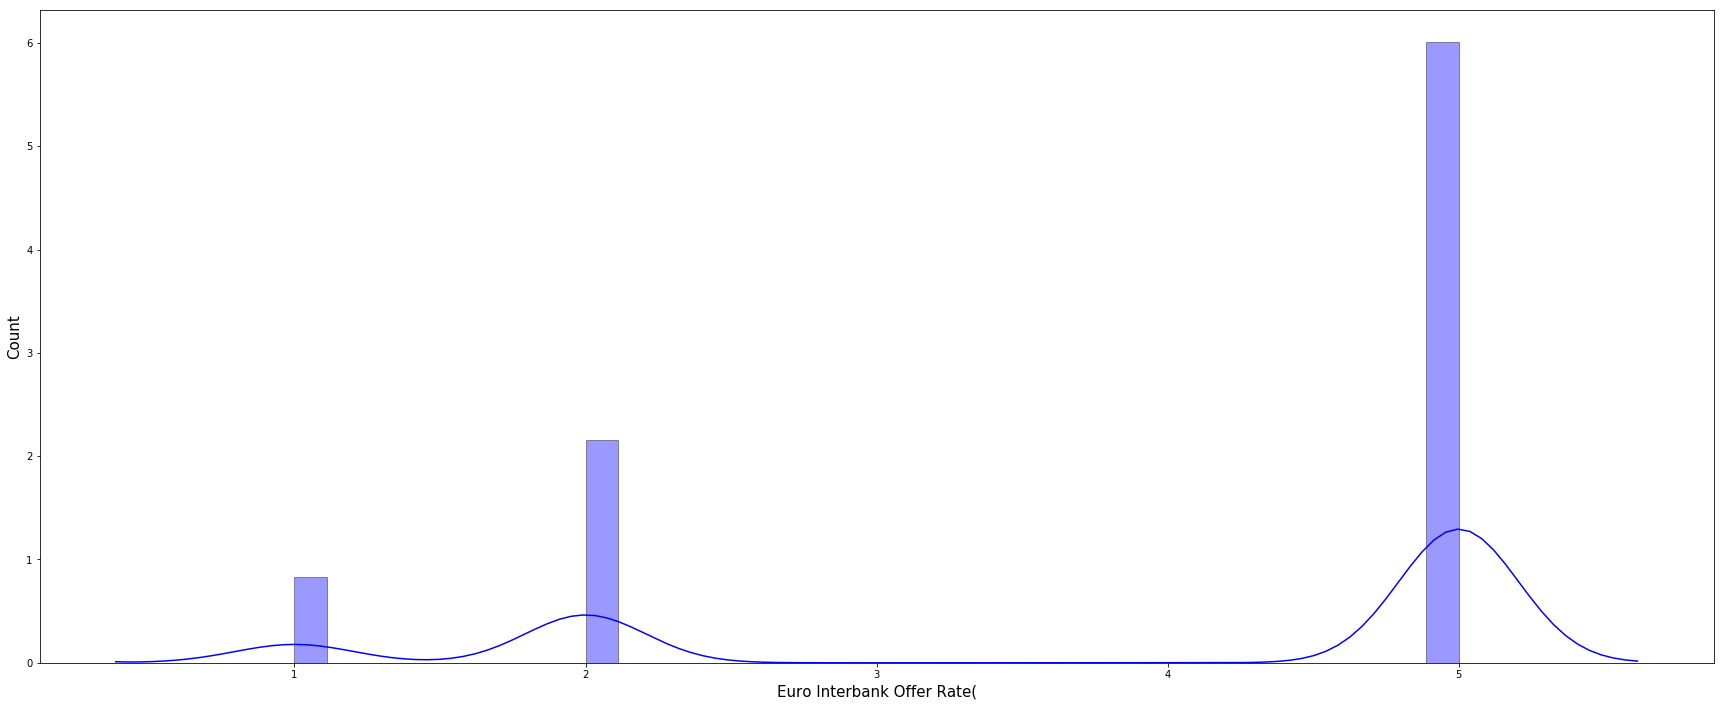

In [58]:
#Plotting Dist Plot of 'euribor3m' Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(bank2['euribor3m'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('Euro Interbank Offer Rate(', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

In [59]:
pd.crosstab(bank2['euribor3m'], bank2['y']).transpose()

euribor3m,1.0,2.0,4.0,5.0
y,,,,
no,1792,7249,13,22742
yes,1391,1047,1,396


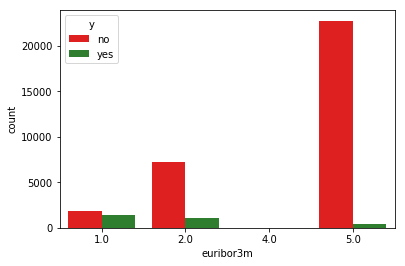

In [60]:
sns.countplot(x = 'euribor3m', data = bank2, hue = 'y', palette = ['#FF0000', '#228B22'] )

# -----------------------------------------------------------------------------------------------------------------------------------------
##### Nr.employed: number of employees - quarterly indicator (numeric)
      
###### Studying and Analysing the 'Nr.employed' Attribute -

In [61]:
#Checking Unique Values in ''nr.employed'' Attribute 
bank2['nr.employed'].value_counts()

5228.1    13125
5099.1     7329
5191.0     6707
5195.8     3310
5076.2     1479
5017.5      869
4991.6      625
4963.6      527
5008.7      525
5023.5      125
5176.3       10
Name: nr.employed, dtype: int64

Text(0, 0.5, 'Count')

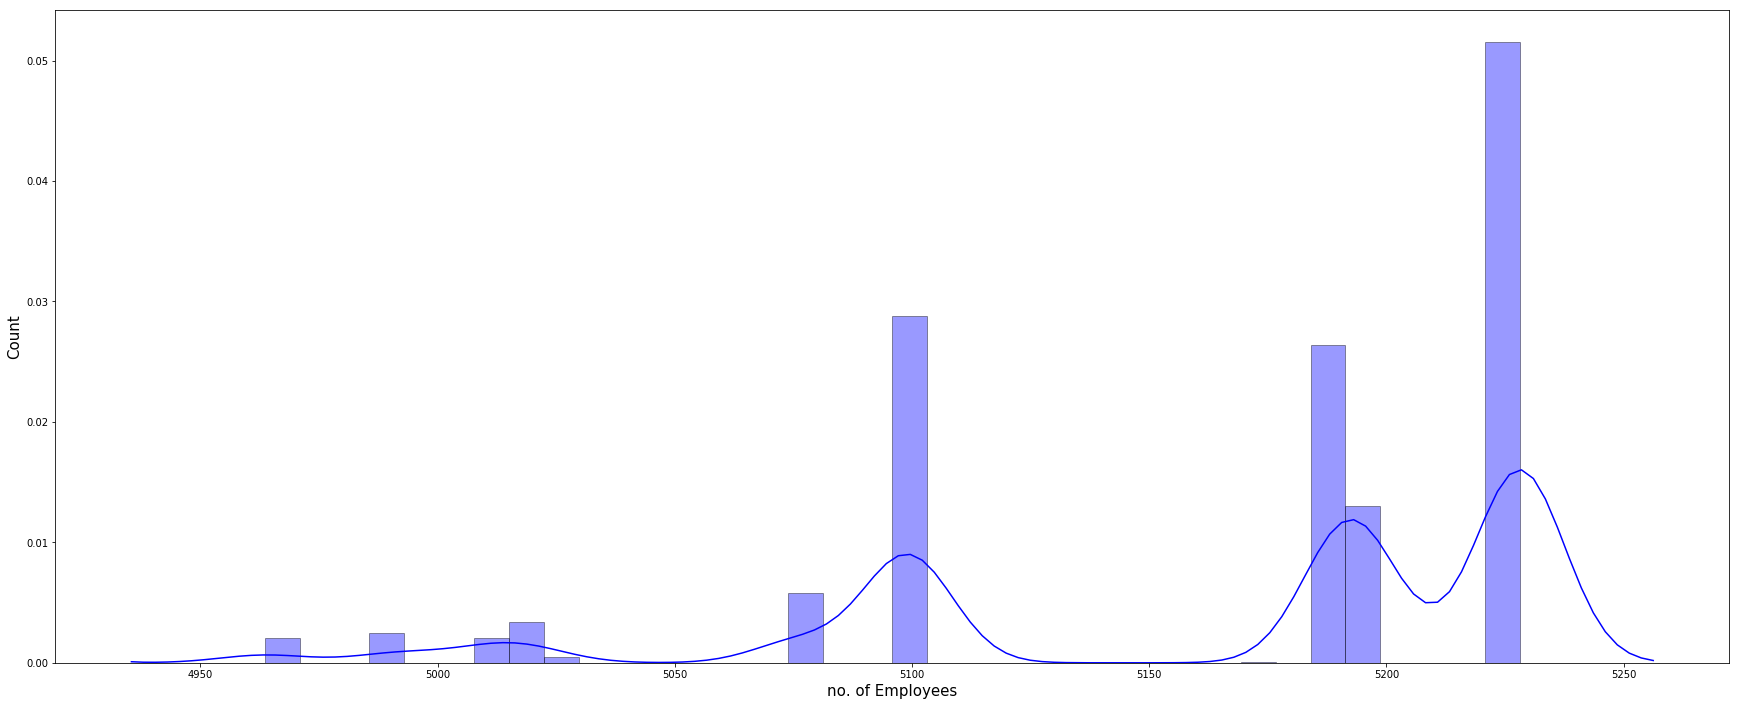

In [62]:
#Plotting Dist Plot of 'nr.employed' Attribute
fig,ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.distplot(bank2['nr.employed'], hist = True, kde = True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
ax.set_xlabel('no. of Employees', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

In [63]:
pd.crosstab(bank2['nr.employed'], bank2['y']).transpose()

nr.employed,4963.6,4991.6,5008.7,5017.5,5023.5,5076.2,5099.1,5176.3,5191.0,5195.8,5228.1
y,,,,,,,,,,,
no,289,325,232,512,62,976,6645,9,6660,3192,12894
yes,238,300,293,357,63,503,684,1,47,118,231


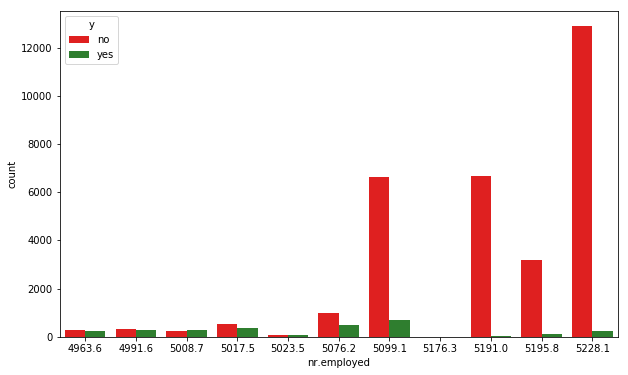

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'nr.employed', data = bank2, hue = 'y', palette = ['#FF0000', '#228B22'] )

# -----------------------------------------------------------------------------------------------------------------------------------------
### Analysing Categorical Attributes-

##### Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', ' technician', 'unemployed',                                   'unknown')

###### Studying Distribution of 'job' Attribute:

In [65]:
# Different types of job categories and their counts
bank2.job.value_counts()

admin.           8856
blue-collar      7860
technician       5739
services         3350
management       2494
entrepreneur     1250
self-employed    1196
retired          1110
housemaid         874
unemployed        866
student           765
unknown           271
Name: job, dtype: int64

In [66]:
#As mentioned in the UCI  document, there are several missing values in some categorical attributes coded with the "unknown" label, we have some in the Job attribute. 
#getting rid of them...
condition = (bank2.job == 'unknown')
bank2 = bank2.drop(bank2[condition].index, axis = 0)
bank2.job.value_counts()

admin.           8856
blue-collar      7860
technician       5739
services         3350
management       2494
entrepreneur     1250
self-employed    1196
retired          1110
housemaid         874
unemployed        866
student           765
Name: job, dtype: int64

In [67]:
# Combine similar jobs into categories to make better predictability
bank2['job'] = bank2['job'].replace(['management','admin.'],'white-collar')
bank2['job'] = bank2['job'].replace(['housemaid','services'],'pink-collar')
bank2['job'] = bank2['job'].replace(['retired','student','unemployed', 'unknown'],'other')
bank2.job.value_counts()

white-collar     11350
blue-collar       7860
technician        5739
pink-collar       4224
other             2741
entrepreneur      1250
self-employed     1196
Name: job, dtype: int64

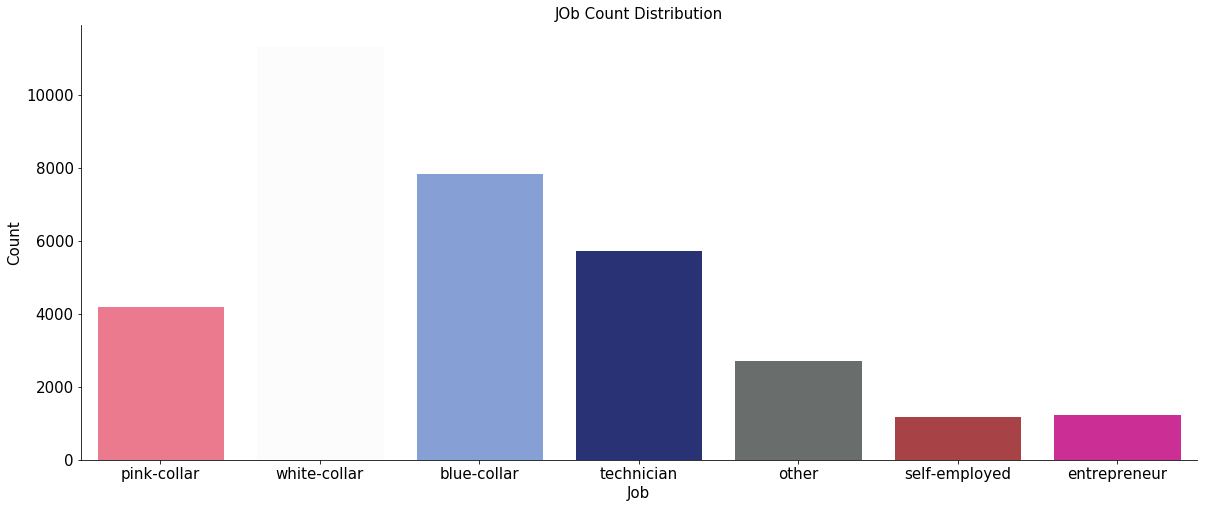

In [68]:
# What kind of jobs this bank's clients have...
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.set_style('darkgrid')
sns.countplot(x = 'job', data = bank2, palette = ['#ff6781', '#fcfcfc', '#799be2', '#1c2882', '#686e6d', '#b83238', '#e5159d'])
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('JOb Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

###### Observation: We have White and Blue Collar Professionals more in our dataset

job  blue-collar  entrepreneur  other  pink-collar  self-employed  technician  \
y                                                                               
no          7567          1183   2224         3989           1109        5271   
yes          293            67    517          235             87         468   

job  white-collar  
y                  
no          10202  
yes          1148  


Text(0.5, 1.0, 'JOb Deposit Distribution')

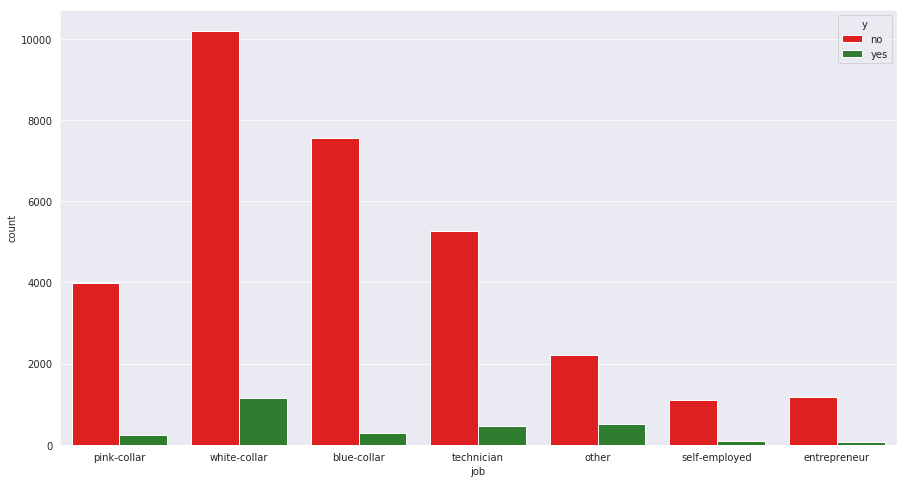

In [69]:
#job and deposit
print(pd.crosstab(bank2['job'], bank2['y']).transpose())
plt.rcParams["figure.figsize"] = (15, 8)
sns.countplot(x = 'job', data = bank2, hue = 'y', palette = ['#FF0000', '#228B22'])
ax.set_title('JOb Deposit Distribution', fontsize=15)

###### Observation: White and Blue  Collar Professionals  are more likely to subscribe Term Deposits 

In [70]:
#OneHotEncoding
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
labelencoder_X.fit(bank2['job'])
bank2['job'] = labelencoder_X.transform(bank2['job'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
1,4,3,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
2,2,3,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
3,3,6,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
4,4,3,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
5,3,3,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
6,4,6,married,professional.course,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
7,3,0,married,unknown,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
8,1,5,single,professional.course,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
9,1,3,single,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no


# -----------------------------------------------------------------------------------------------------------------------------------------

##### Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

###### Studying Distribution of 'Marital Status' Attribute:

In [71]:
# Marital Status of Clients:
bank2.marital.value_counts()

married     20767
single       9760
divorced     3780
unknown        53
Name: marital, dtype: int64

In [72]:
#As mentioned in the UCI  document, there are several missing values in some categorical attributes coded with the "unknown" label, we have some in the marital attribute. 
#getting rid of them...
condition = (bank2.marital == 'unknown')
bank2 = bank2.drop(bank2[condition].index, axis = 0)
bank2.marital.value_counts()

married     20767
single       9760
divorced     3780
Name: marital, dtype: int64

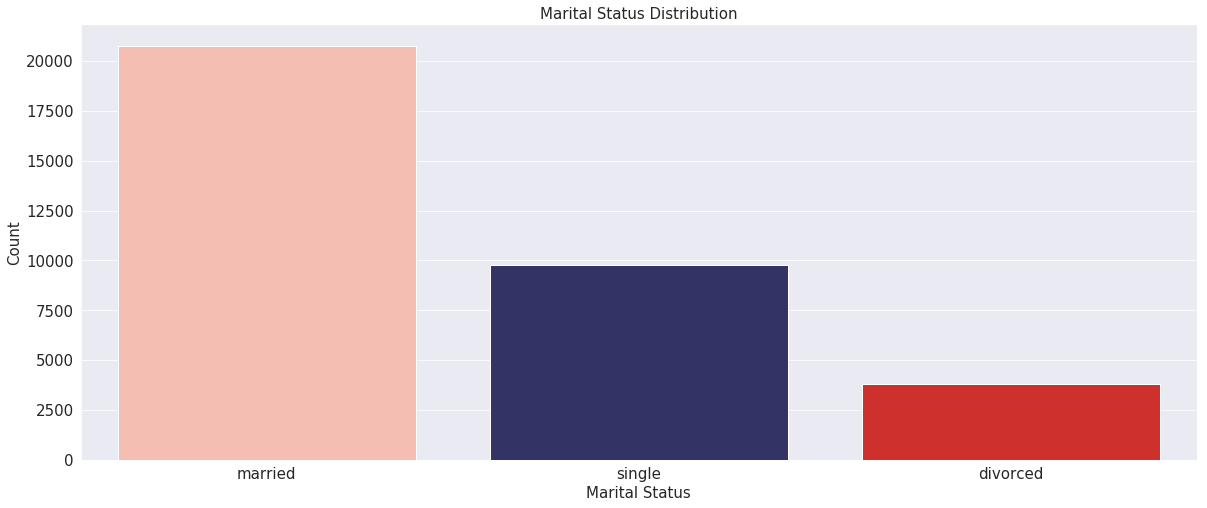

In [73]:
# Checking Marital Status of Bank's Clients...
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.set_style('darkgrid')
sns.countplot(x = 'marital', data = bank2, palette = ['#FFB8A7', '#2B2A6F', '#E91812'])
ax.set_xlabel('Marital Status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Status Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

###### Observation: Bank has Married Clients more as compared to Single and Divorsed/Widows

marital  divorced  married  single
y                                 
no           3538    19316    8643
yes           242     1451    1117


Text(0.5, 1.0, 'Marital Deposit Distribution')

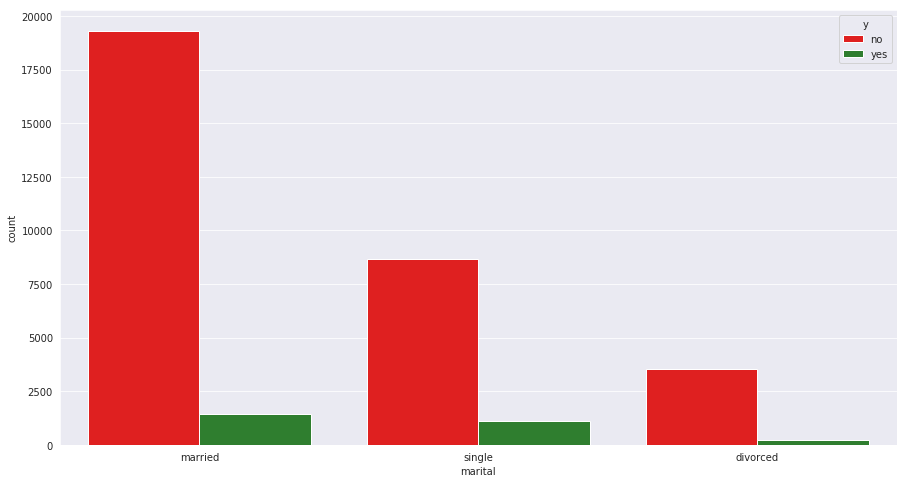

In [74]:
#Marital Status and deposit
print(pd.crosstab(bank2['marital'], bank2['y']).transpose())
plt.rcParams["figure.figsize"] = (15, 8)
sns.countplot(x = 'marital', data = bank2, hue = 'y', palette = ['#FF0000', '#228B22'])
ax.set_title('Marital Deposit Distribution', fontsize=15)

###### Married Clients ar more likely to Subscribe for Term Deposits followed by Singles

In [75]:
labelencoder_X.fit(bank2['marital'])
bank2['marital'] = labelencoder_X.transform(bank2['marital'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
1,4,3,1,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
2,2,3,1,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
3,3,6,1,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
4,4,3,1,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
5,3,3,1,basic.9y,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
6,4,6,1,professional.course,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
7,3,0,1,unknown,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
8,1,5,2,professional.course,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
9,1,3,2,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no


# -----------------------------------------------------------------------------------------------------------------------------------------

##### Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

###### Studying Distribution of 'Marital Status' Attribute:

In [76]:
# Analyzing Educational Qualification of Clients
bank2.education.value_counts()

university.degree      10252
high.school             7997
basic.9y                5120
professional.course     4420
basic.4y                3285
basic.6y                1901
unknown                 1318
illiterate                14
Name: education, dtype: int64

In [77]:
#As mentioned in the UCI  document, there are several missing values in some categorical attributes coded with the "unknown" label, we have some in the Job attribute. 
#getting rid of them...
condition = (bank2.education == 'unknown')
bank2 = bank2.drop(bank2[condition].index, axis = 0)
bank2.education.value_counts()

university.degree      10252
high.school             7997
basic.9y                5120
professional.course     4420
basic.4y                3285
basic.6y                1901
illiterate                14
Name: education, dtype: int64

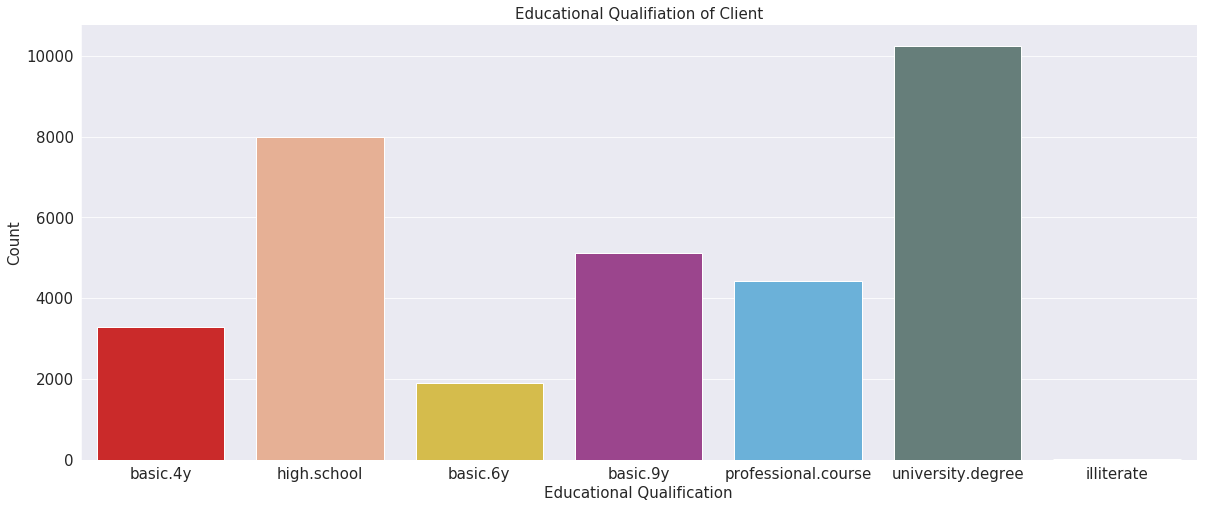

In [78]:
# What is the Educational Qualification of bank's clients...
fig, ax = plt.subplots()
fig.set_size_inches(20, 8) 
sns.set_style('darkgrid')
sns.countplot(x = 'education', data = bank2, palette = ['#e50f0f', '#f4ab87', '#eccb35', '#A93796', '#59b6eb', '#62827C', '#000204'])
ax.set_xlabel('Educational Qualification', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Educational Qualifiation of Client', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

###### Approximately 31% of our clients have completed their University Degree

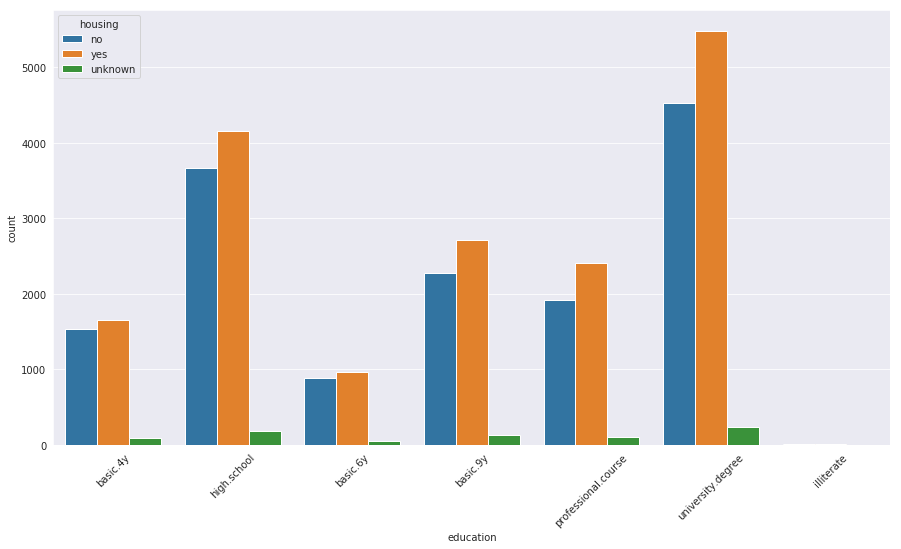

In [79]:
#Checking how qualification of a person affects availing a housing loan..
plt.xticks(rotation = 45)
sns.countplot(x='education', data = bank2, hue='housing')

###### Observation: Clients who have completed HighSchool Level education and University Degree are likely to purchase housing loan

education  basic.4y  basic.6y  basic.9y  high.school  illiterate  \
y                                                                  
no             3096      1818      4886         7370          12   
yes             189        83       234          627           2   

education  professional.course  university.degree  
y                                                  
no                        4036               9106  
yes                        384               1146  


Text(0.5, 1.0, 'Education Deposit Distribution')

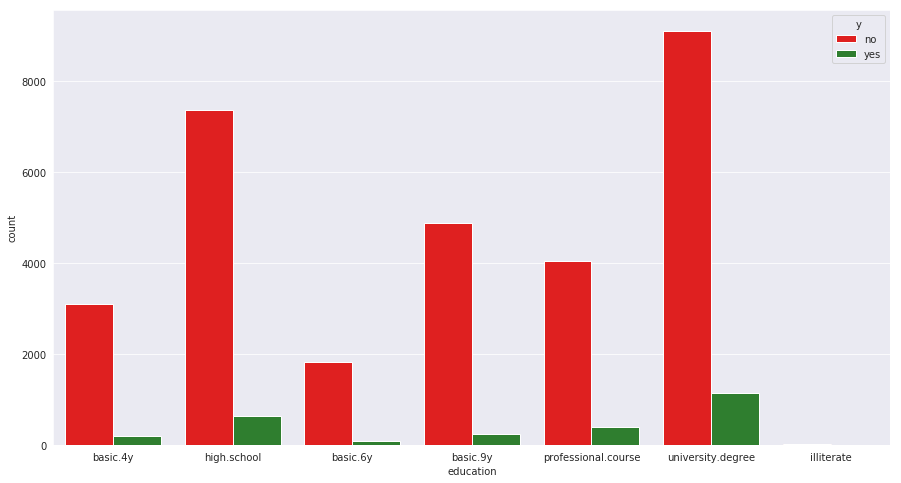

In [80]:
#Education and deposit
print(pd.crosstab(bank2['education'], bank2['y']).transpose())
plt.rcParams["figure.figsize"] = (15, 8)
sns.countplot(x = 'education', data = bank2, hue = 'y', palette = ['#FF0000', '#228B22'])
ax.set_title('Education Deposit Distribution', fontsize=15)

###### Observation: Highschool and University Degree Qualifed Clients are likely to takeup Term Deposit

In [81]:
labelencoder_X.fit(bank2['education'])
bank2['education'] = labelencoder_X.transform(bank2['education'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
1,4,3,1,3,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
2,2,3,1,3,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
3,3,6,1,1,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
4,4,3,1,3,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
5,3,3,1,2,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
6,4,6,1,5,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
8,1,5,2,5,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
9,1,3,2,3,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
11,1,3,2,3,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no


# -----------------------------------------------------------------------------------------------------------------------------------------


##### Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

###### Studying Distribution of 'Default' Attribute:

no         26352
unknown     6634
yes            3
Name: default, dtype: int64


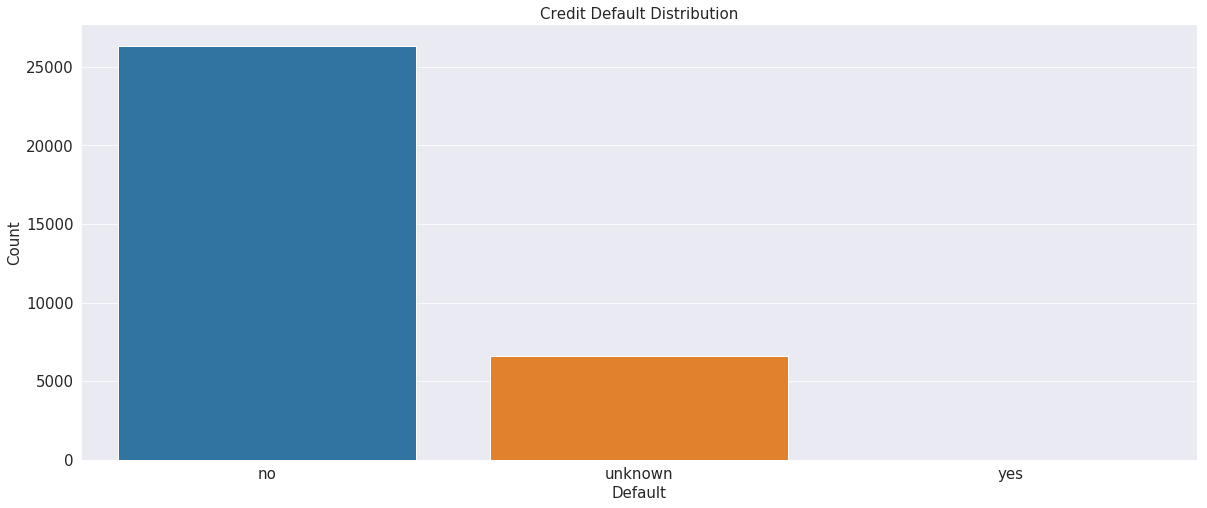

In [82]:
# Checking Distribution of values in Default column:
print(bank2.default.value_counts())
# Defaults this bank's clients have...
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.set_style('dark')
sns.countplot(x = 'default', data = bank2)
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Credit Default Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

###### Observation: Majority of Bank's Clients donot have Credit in Default

default     no  unknown  yes
y                           
no       23818     6503    3
yes       2534      131    0


Text(0.5, 1.0, 'default Credit Deposit Distribution')

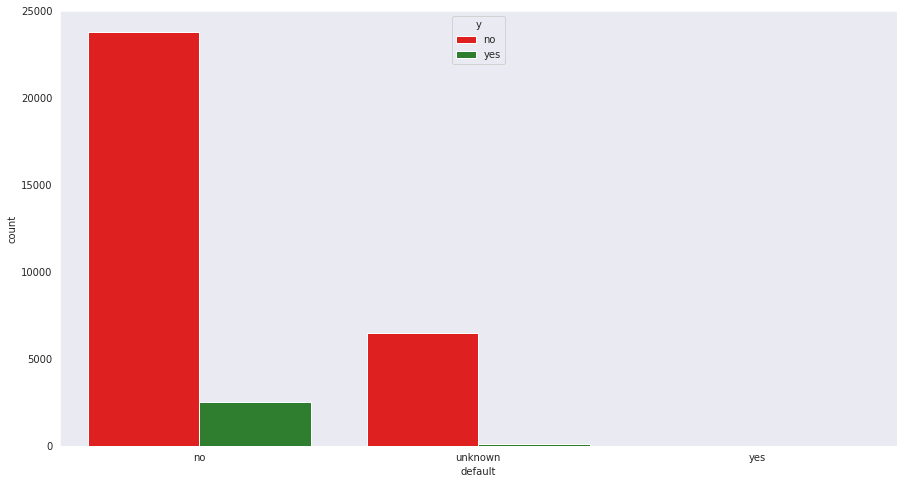

In [83]:
#default and deposit
print(pd.crosstab(bank2['default'], bank2['y']).transpose())
sns.countplot(x = 'default', data = bank2, hue = 'y', palette = ['#FF0000', '#228B22'])
ax.set_title('default Credit Deposit Distribution', fontsize=15)


###### Observation: Clients who donot have Credit in default ar more likely to subscribe to Term Deposit

In [84]:
labelencoder_X.fit(bank2['default'])
bank2['default'] = labelencoder_X.transform(bank2['default'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
1,4,3,1,3,1,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
2,2,3,1,3,0,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
3,3,6,1,1,0,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
4,4,3,1,3,0,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
5,3,3,1,2,1,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
6,4,6,1,5,0,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
8,1,5,2,5,0,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
9,1,3,2,3,0,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
11,1,3,2,3,0,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no


# -----------------------------------------------------------------------------------------------------------------------------------------

##### #Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

###### Studying Distribution of 'Housing' Attribute:

In [85]:
bank2.housing.value_counts()

yes        17373
no         14815
unknown      801
Name: housing, dtype: int64

In [86]:
#As mentioned in the UCI  document, there are several missing values in some categorical attributes coded with the "unknown" label, we have some in the housing attribute. 
#getting rid of them...
condition = (bank2.housing == 'unknown')
bank2 = bank2.drop(bank2[condition].index, axis = 0)
bank2.housing.value_counts()

yes    17373
no     14815
Name: housing, dtype: int64

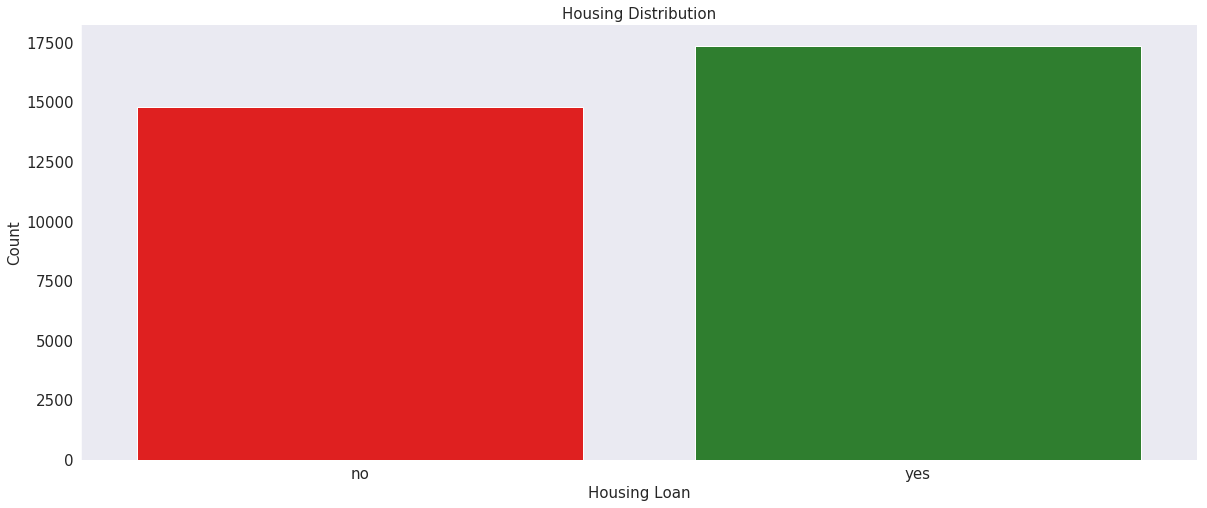

In [87]:
# Do the Bank Clients have Housing Loans?
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.set_style('darkgrid')
sns.countplot(x = 'housing', data = bank2, palette = ['#FF0000', '#228B22'])
ax.set_xlabel('Housing Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

###### There is almost equal spread among the Clients buying Housing Loan and the ones not prefering it. 

housing     no    yes
y                    
no       13668  15916
yes       1147   1457


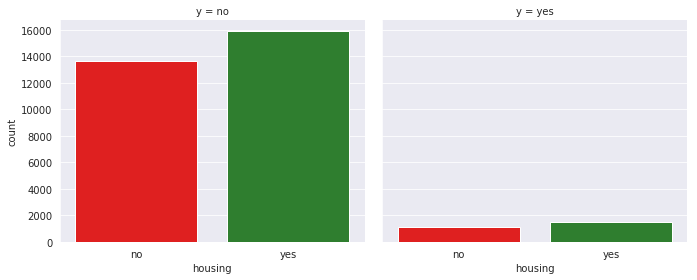

In [88]:
#Housing Loan and deposit
print(pd.crosstab(bank2['housing'], bank2['y']).transpose())
ax.set_title('Housing Loan Deposit Distribution', fontsize=15)
sns.catplot(x = 'housing', col = 'y', data = bank2, kind="count", height = 4, aspect = 1.2, palette = ['#FF0000', '#228B22']) 

###### Observation: Both the classes i.e. clients with and without housing loans are more or less same likely to subscribe Term Deposits

In [89]:
labelencoder_X.fit(bank2['housing'])
bank2['housing'] = labelencoder_X.transform(bank2['housing'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
1,4,3,1,3,1,0,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
2,2,3,1,3,0,1,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
3,3,6,1,1,0,0,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
4,4,3,1,3,0,0,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
5,3,3,1,2,1,0,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
6,4,6,1,5,0,0,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
8,1,5,2,5,0,1,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
9,1,3,2,3,0,1,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
11,1,3,2,3,0,1,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no


# -----------------------------------------------------------------------------------------------------------------------------------------


##### Loan : has Personal loan? (categorical: 'no', 'yes', 'unknown')

###### Studying Distribution of 'Personal Loan' Attribute:

In [90]:
#Distribution in Loan Attribute:
bank2.loan.value_counts()

no     27179
yes     5009
Name: loan, dtype: int64

In [91]:
bank2.groupby(['loan', 'y']).y.count()

loan  y  
no    no     24955
      yes     2224
yes   no      4629
      yes      380
Name: y, dtype: int64

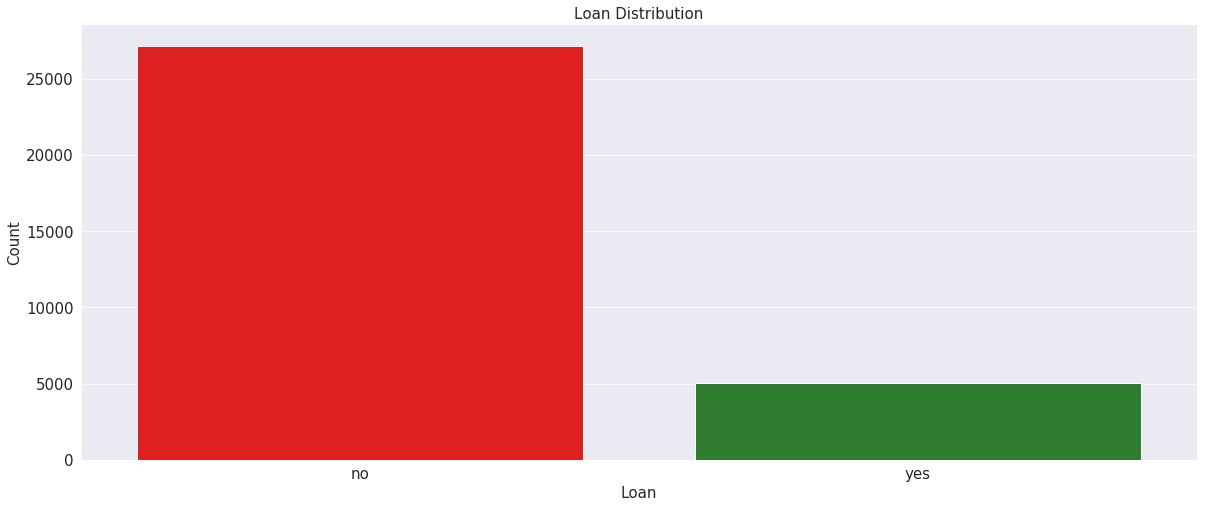

In [92]:
# Loan Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.set_style('darkgrid')
sns.countplot(x = 'loan', data = bank2, palette = ['#FF0000', '#228B22'])
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

###### Observation: majority of Clients donot have Persoanl Loans over them

loan     no   yes
y                
no    24955  4629
yes    2224   380


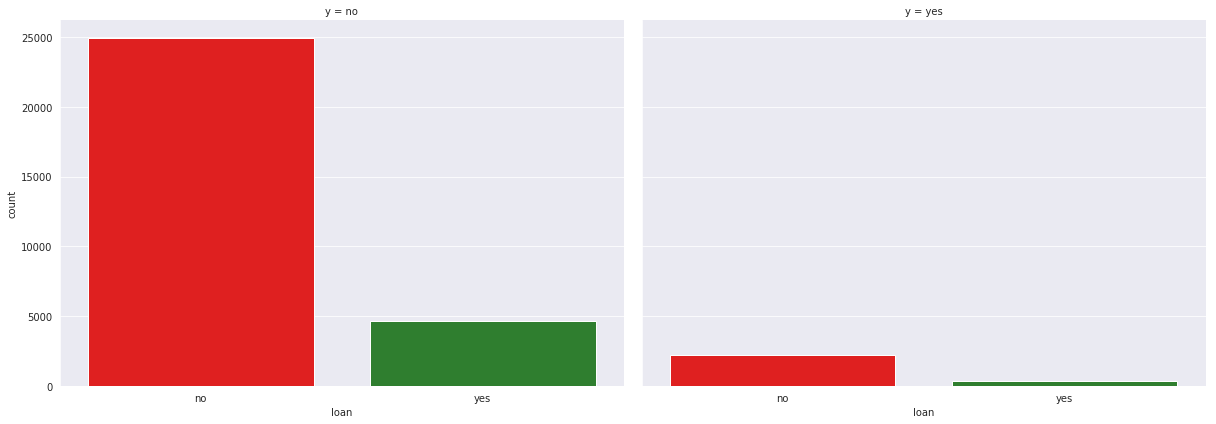

In [93]:
#Loan and Deposit
print(pd.crosstab(bank2['loan'], bank2['y']).transpose())
ax.set_title('Loan Deposit Distribution', fontsize=15)
sns.catplot(x = 'loan', col = 'y', data = bank2, kind="count", height = 6, aspect = 1.4, palette = ['#FF0000', '#228B22'])

###### Observation: Clients who dont have Loans are more likely to avail Term Deposits

In [94]:
labelencoder_X.fit(bank2['loan'])
bank2['loan'] = labelencoder_X.transform(bank2['loan'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
1,4,3,1,3,1,0,0,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
2,2,3,1,3,0,1,0,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
3,3,6,1,1,0,0,0,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
4,4,3,1,3,0,0,1,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
5,3,3,1,2,1,0,0,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
6,4,6,1,5,0,0,0,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
8,1,5,2,5,0,1,0,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
9,1,3,2,3,0,1,0,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
11,1,3,2,3,0,1,0,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no


# -----------------------------------------------------------------------------------------------------------------------------------------


### Contact: contact communication type (categorical: 'cellular','telephone')

###### Studying Distribution of 'Contact' Attribute:

In [95]:
#How was the Client Contacted?
bank2.contact.value_counts()

cellular     20684
telephone    11504
Name: contact, dtype: int64

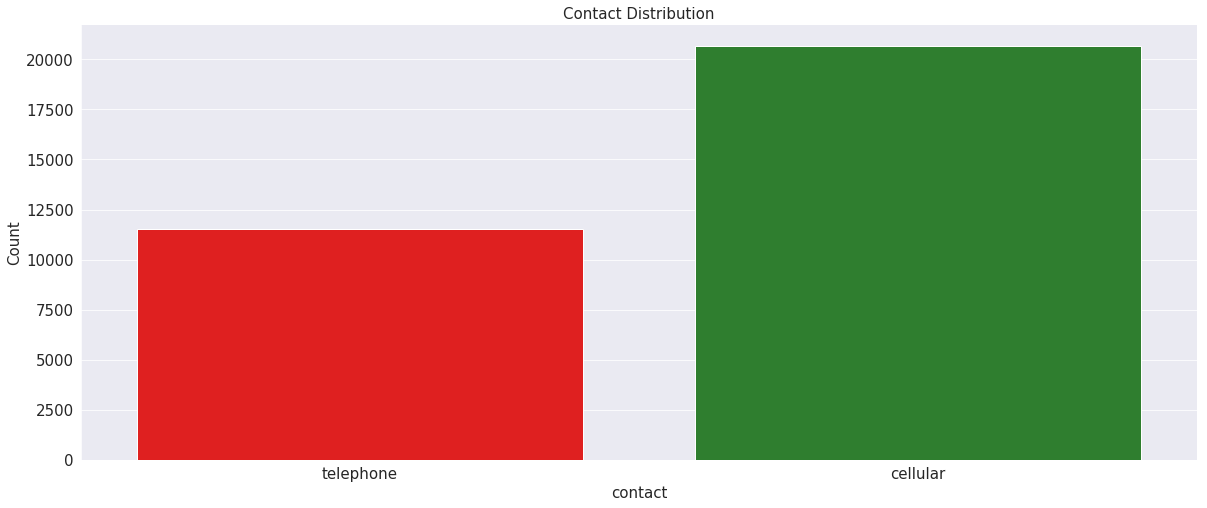

In [96]:
#Plotting Distribution of Contact Mode 
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.set_style('darkgrid')
sns.countplot(x = 'contact', data = bank2, palette = ['#FF0000', '#228B22'])
ax.set_xlabel('contact', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Contact Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

###### Observation: Cellular Mode was preferred over telephone to contact clients

contact  cellular  telephone
y                           
no          18393      11191
yes          2291        313


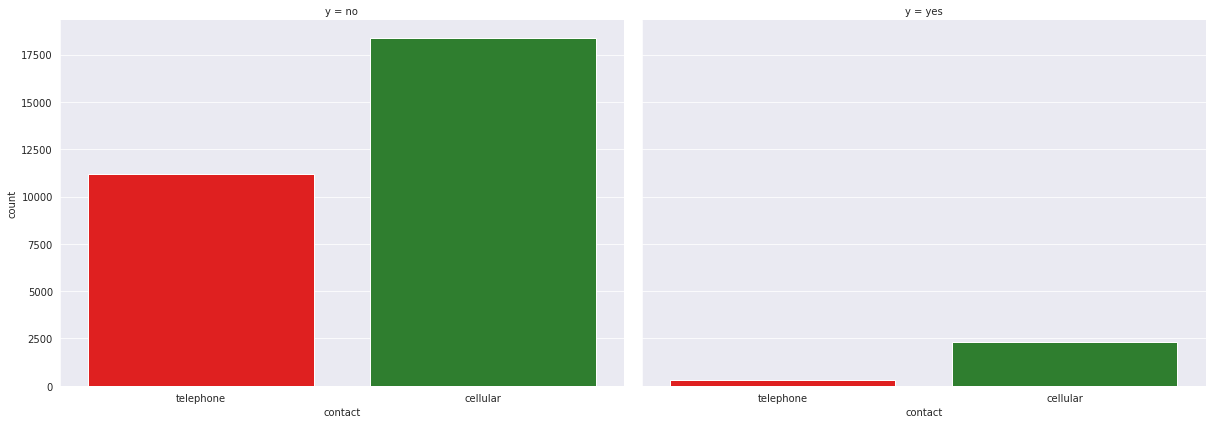

In [97]:
#Contact and Deposit
print(pd.crosstab(bank2['contact'], bank2['y']).transpose())
ax.set_title('Contact Deposit Distribution', fontsize=15)
sns.catplot(x = 'contact', col = 'y', data = bank2, kind="count", height = 6, aspect = 1.4, palette = ['#FF0000', '#228B22']) 

###### Observation: Cellular Mode of Contact was more Successful in luring Client to avail Term Deposit

In [98]:
labelencoder_X.fit(bank2['contact'])
bank2['contact'] = labelencoder_X.transform(bank2['contact'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,1,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
1,4,3,1,3,1,0,0,1,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
2,2,3,1,3,0,1,0,1,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
3,3,6,1,1,0,0,0,1,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
4,4,3,1,3,0,0,1,1,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
5,3,3,1,2,1,0,0,1,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
6,4,6,1,5,0,0,0,1,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
8,1,5,2,5,0,1,0,1,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
9,1,3,2,3,0,1,0,1,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
11,1,3,2,3,0,1,0,1,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no


# -----------------------------------------------------------------------------------------------------------------------------------------


### Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

###### Studying and Analysing Month Attribute

In [99]:
bank2.month.value_counts()

may    10986
jul     5254
aug     4892
jun     3983
nov     3481
apr     2100
oct      539
mar      420
sep      413
dec      120
Name: month, dtype: int64

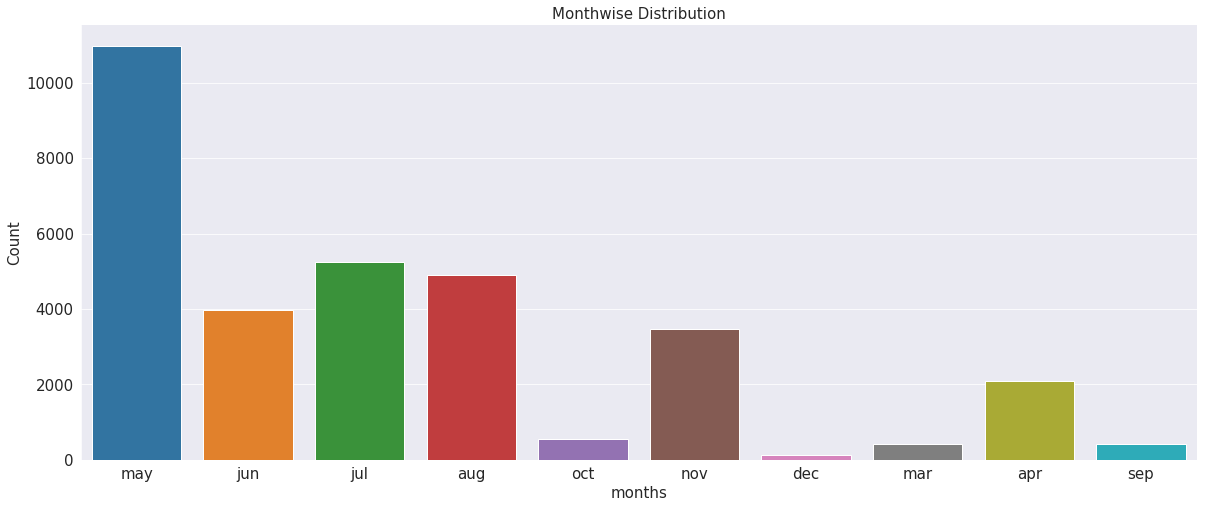

In [100]:
#Plotting Monthwise Distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.set_style('darkgrid')
sns.countplot(x = 'month', data = bank2)
ax.set_xlabel('months', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Monthwise Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

###### It seems that May is the most busiest month whereas in january and febraruary months people werent contacted at all or the data of these months is unavailable.

month   apr   aug  dec   jul   jun  mar    may   nov  oct  sep
y                                                             
no     1756  4531   66  4997  3657  202  10607  3243  296  229
yes     344   361   54   257   326  218    379   238  243  184


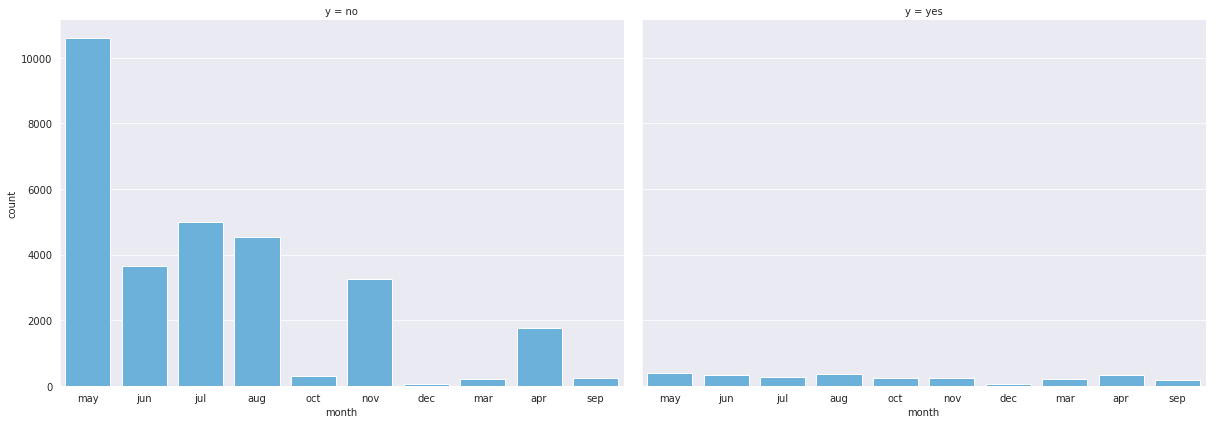

In [101]:
#Month and Deposit
print(pd.crosstab(bank2['month'], bank2['y']).transpose())
ax.set_title('Loan Deposit Distribution', fontsize=15)
sns.catplot(x = 'month', col = 'y', data = bank2, kind="count", height = 6, aspect = 1.4, palette = ['#59b6eb'])

##### May Month was the Busiest. It was also the most Successful month. bnk needs to focus on attracting Customers in these months also viz. March, September, October, December .

In [102]:
labelencoder_X.fit(bank2['month'])
bank2['month'] = labelencoder_X.transform(bank2['month'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,1,6,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
1,4,3,1,3,1,0,0,1,6,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
2,2,3,1,3,0,1,0,1,6,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
3,3,6,1,1,0,0,0,1,6,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
4,4,3,1,3,0,0,1,1,6,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
5,3,3,1,2,1,0,0,1,6,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
6,4,6,1,5,0,0,0,1,6,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
8,1,5,2,5,0,1,0,1,6,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
9,1,3,2,3,0,1,0,1,6,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
11,1,3,2,3,0,1,0,1,6,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no


# -----------------------------------------------------------------------------------------------------------------------------------------

#### Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

###### Studying and Analysing Day_of_Week attribute:

In [103]:
bank2.day_of_week.value_counts()

mon    6783
thu    6622
wed    6403
tue    6381
fri    5999
Name: day_of_week, dtype: int64

###### It looks No client was contacted on weekends

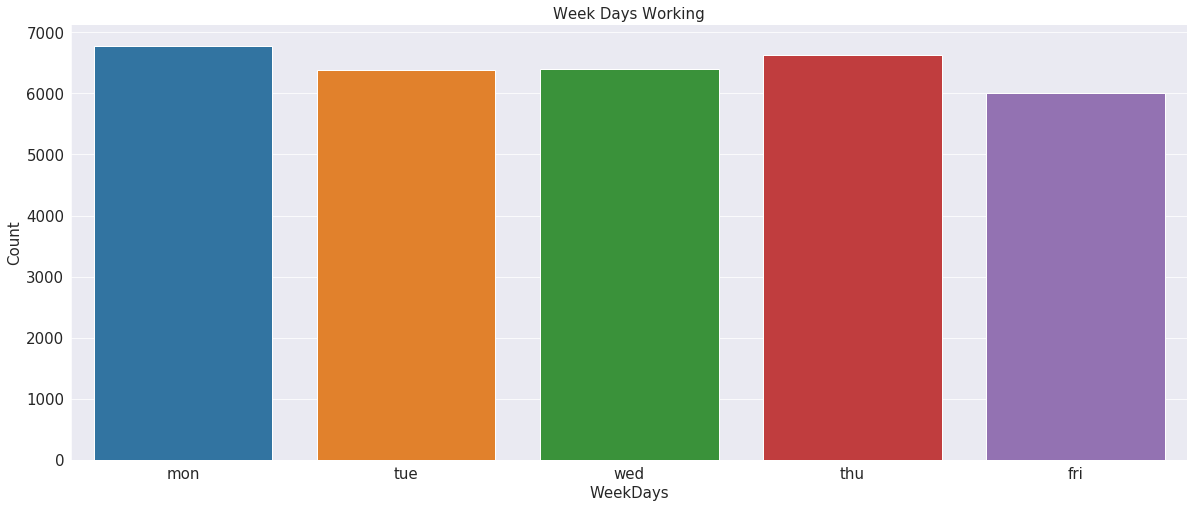

In [104]:
#Distribution of Contact Day
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.set_style('darkgrid')
sns.countplot(x = 'day_of_week', data = bank2)
ax.set_xlabel('WeekDays', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Week Days Working', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

###### All Weekdays had been very busy. But thursday had been busiest of all.

day_of_week   fri   mon   thu   tue   wed
y                                        
no           6981  7667  7578  7137  7185
yes           846   847  1045   953   949


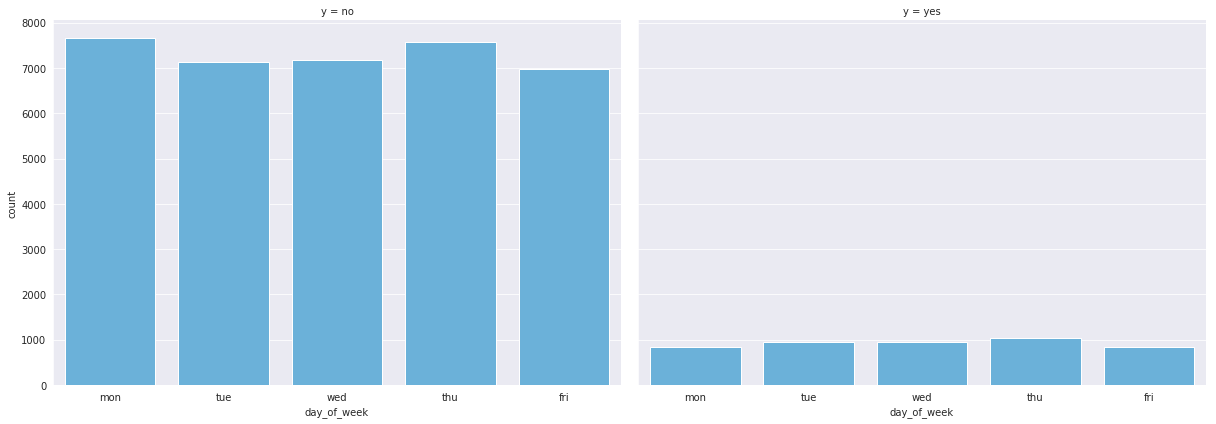

In [105]:
#days_of and Deposit
print(pd.crosstab(bank_df['day_of_week'], bank_df['y']).transpose())
ax.set_title(' Working Days Deposit Distribution', fontsize=15)
sns.catplot(x = 'day_of_week', col = 'y', data = bank_df, kind="count", height = 6, aspect = 1.4, palette = ['#59b6eb']) 

###### Thursday has been Busiest and Successful of all the days in acquiring the Customers towards Term Deposits

In [106]:
labelencoder_X.fit(bank2['day_of_week'])
bank2['day_of_week'] = labelencoder_X.transform(bank2['day_of_week'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,1,6,1,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
1,4,3,1,3,1,0,0,1,6,1,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
2,2,3,1,3,0,1,0,1,6,1,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
3,3,6,1,1,0,0,0,1,6,1,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
4,4,3,1,3,0,0,1,1,6,1,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
5,3,3,1,2,1,0,0,1,6,1,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
6,4,6,1,5,0,0,0,1,6,1,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
8,1,5,2,5,0,1,0,1,6,1,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
9,1,3,2,3,0,1,0,1,6,1,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no
11,1,3,2,3,0,1,0,1,6,1,...,1,0,0,nonexistent,1.1,93.994,-36.4,5.0,5191.0,no


# -----------------------------------------------------------------------------------------------------------------------------------------

#### Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

###### Studying and  Analysing poutcome of the campaign

In [107]:
bank2.poutcome.value_counts()

nonexistent    27685
failure         3465
success         1038
Name: poutcome, dtype: int64

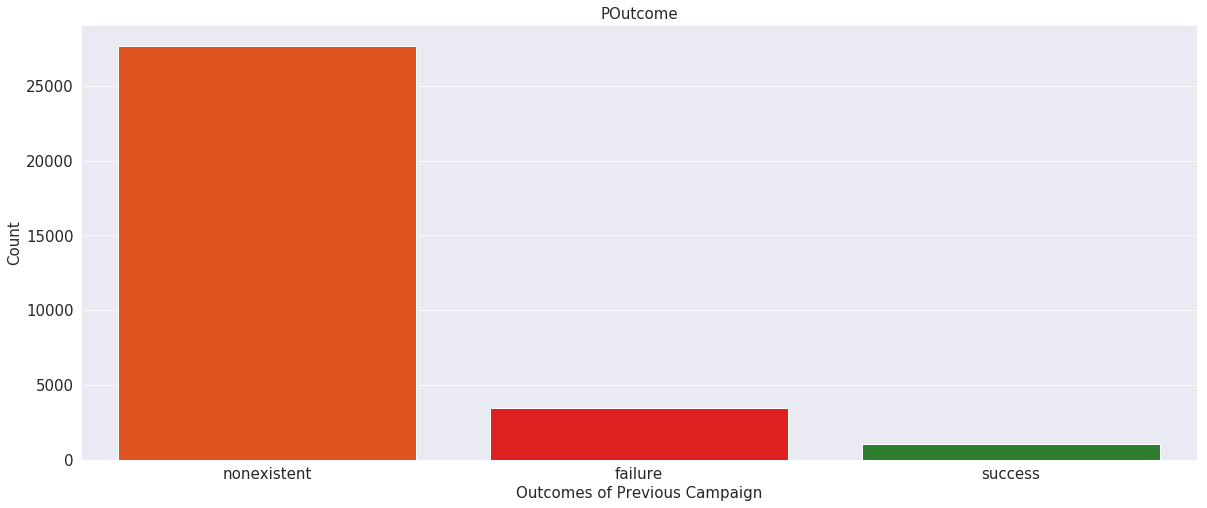

In [108]:
#Distribution of Outcome from Previous Campaign
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.set_style('darkgrid')
sns.countplot(x = 'poutcome', data = bank2, palette = ['#FF4500', '#FF0000', '#228B22'])
ax.set_xlabel('Outcomes of Previous Campaign', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('POutcome', fontsize=15)
ax.tick_params(labelsize=15)

##### Observation: Most of the Data in this attribute is non existent. We cannot draw any conclusion from this distribution. Lets check its correlation with target variable before taking any call.

poutcome  failure  nonexistent  success
y                                      
no           3097        26100      387
yes           368         1585      651


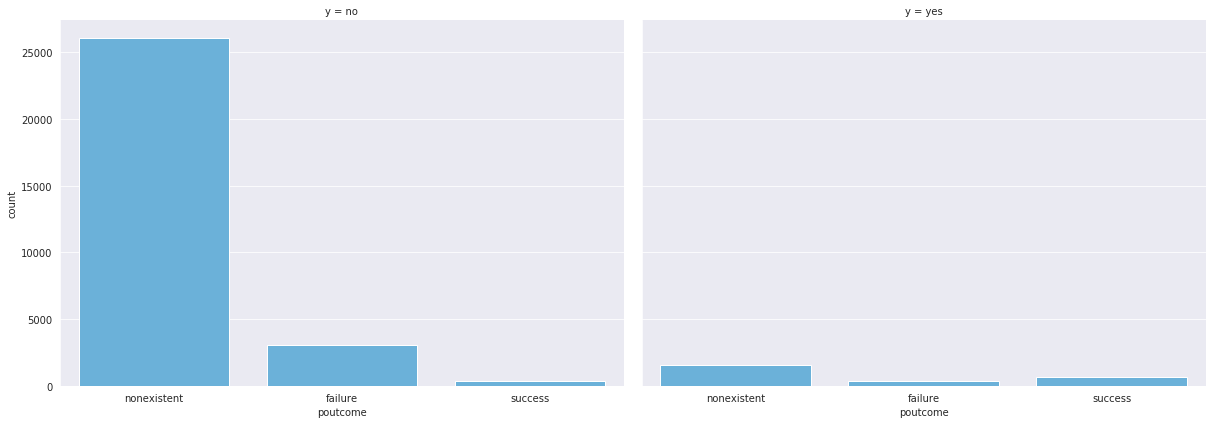

In [109]:
#Poutcome and Deposit
print(pd.crosstab(bank2['poutcome'], bank2['y']).transpose())
ax.set_title(' poutcome Deposit Distribution', fontsize=15)
sns.catplot(x = 'poutcome', col = 'y', data = bank2, kind="count", height = 6, aspect = 1.4, palette = ['#59b6eb']) 
sns.despine()

In [110]:
labelencoder_X.fit(bank2['poutcome'])
bank2['poutcome'] = labelencoder_X.transform(bank2['poutcome'])
bank2.head(10)

labelencoder_X.fit(bank2['y'])
bank2['y'] = labelencoder_X.transform(bank2['y'])
bank2.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,1,0,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,5.0,5191.0,0
1,4,3,1,3,1,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,5.0,5191.0,0
2,2,3,1,3,0,1,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,5.0,5191.0,0
3,3,6,1,1,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,5.0,5191.0,0
4,4,3,1,3,0,0,1,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,5.0,5191.0,0
5,3,3,1,2,1,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,5.0,5191.0,0
6,4,6,1,5,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,5.0,5191.0,0
8,1,5,2,5,0,1,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,5.0,5191.0,0
9,1,3,2,3,0,1,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,5.0,5191.0,0
11,1,3,2,3,0,1,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,5.0,5191.0,0


In [111]:
bank2.shape

(32188, 21)

In [112]:
bank2.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

# -----------------------------------------------------------------------------------------------------------------------------------------

### Building Models

#### Handling Target Class  Imbalance:

In [120]:
from sklearn.utils import resample
seed = 123
df_majority = bank2[bank2['y'] == 0]
df_minority = bank2[bank2['y'] == 1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples= int(4640*2), random_state = seed)

#IMBALANCED DATASET FIX
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [121]:
#Capturing the Class Values from "y" column 
y_new = df_upsampled['y']  
#Stroring bank_labels data into a seperate np array
y = np.array(y_new)                              

#Storing Normalized Feature Data into np Array
bank_features = df_upsampled.drop('y', axis = 1)
X = np.array(bank_features)

#Splitting X and y into training and test set in 70:30 Ratio as Mentioned
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = seed)


##### Lets first standardize our data i.e. transform the data in a way that the variance is unitary and that the mean of the series is 0.

In [126]:
# Creating train test sets of test size = 0.3
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Deliverable 3 (Building Base Models and Ensemble Models)

##### KNN Algorithm:

KNN algorithm is chosen because it is best suited for classification problem where relationship between features and target class is numerous, complex and difficult to understand and yet items in a class tend to be fairly homogenous on the values of attributes. Here, there are 20 features distributed over a large data 41188 records. 

In [127]:
from sklearn.neighbors import KNeighborsClassifier #
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(accuracy_score(y_test, knnpred)* 100)

89.05660377358491


Overall Acuracy:  0.8905660377358491
[[8032  818]
 [ 458 2352]]
recall :  0.8370106761565836
Precision :  0.7419558359621451
Cross Val Score:  0.8787677826729795


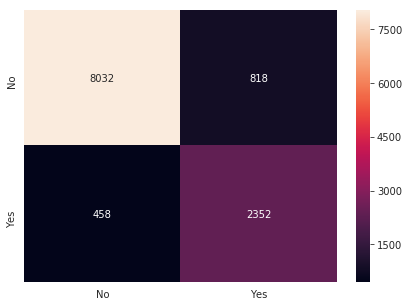

In [128]:
kNN_score = knn.score(X_test, y_test)
print('Overall Acuracy: ', kNN_score)

predicted_labels = knn.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted_labels))
cm = metrics.confusion_matrix(y_test, predicted_labels, labels = [0, 1])

kNN_Recall = cm[1, 1]/(cm[1, 0] +cm[1, 1])
print('recall : ', kNN_Recall)

kNN_Precision = cm[1, 1]/(cm[0, 1] + cm[1, 1])
print('Precision : ', kNN_Precision)


#Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models
kNN_scores = cross_val_score(knn, X_train, y_train, cv = 3)
print('Cross Val Score: ', kNN_scores.mean())

With Overall accuracy of 89.05%, this model is capable of making 83.7% right predictions for Class 'Yes' i.e. for the customer likely to avail the Term Deposit. This is fair output. However it is not acceptable for Production

#### Decision Tree Algorithm:
It mimics the human level thinking. Thus it becomes simple to understand the data to be able to make good interpretations

In [134]:
model_entropy=DecisionTreeClassifier(criterion = 'entropy', random_state = seed)
model_entropy.fit(X_train, y_train)
y_predict = model_entropy.predict(X_test)

Overall Acuracy:  0.9403087478559177
[[8275  575]
 [ 121 2689]]
recall :  0.9569395017793594
Precision :  0.8238357843137255
Cross Val Score:  0.9190928081947187


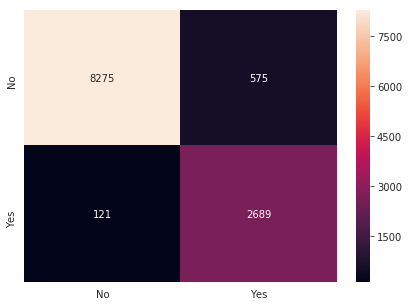

In [135]:
entropy_score = model_entropy.score(X_test, y_test)
print('Overall Acuracy: ', entropy_score)

predicted_labels = model_entropy.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted_labels))
cm = metrics.confusion_matrix(y_test, y_predict, labels = [0, 1])


dct_Recall = cm[1, 1]/(cm[1, 0] +cm[1, 1])
print('recall : ', dct_Recall)

dct_Precision = cm[1, 1]/(cm[0, 1] + cm[1, 1])
print('Precision : ', dct_Precision)


#Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models
entropy_scores = cross_val_score(model_entropy, X_train, y_train, cv = 3)
print('Cross Val Score: ', entropy_scores.mean())

With Overall accuracy of 94.03%, this model is capable of making 95.69% right predictions for Class 'Yes' i.e. for the customer likely to avail the Term Deposit. This is an excellent output. However it should be considered that DEcision Tree is Prone to overfitting and hence it needs to be taken care of.

In [136]:
#Pruning DecisionTree Classifier:

In [141]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = seed,
                               max_depth=5, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)
y_predict = clf_pruned.predict(X_test)

Overall Acuracy:  0.8777015437392796
[[8375  475]
 [ 951 1859]]
recall :  0.6615658362989324
Precision :  0.7964867180805484
Cross Val Score:  0.8797972052361295


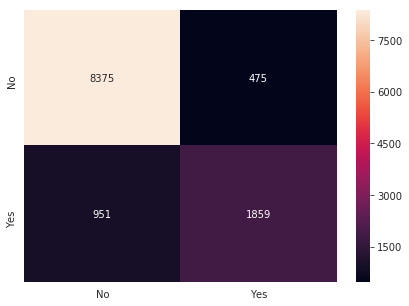

In [142]:
pru_score = clf_pruned.score(X_test, y_test)
print('Overall Acuracy: ', pru_score)

predicted_labels = clf_pruned.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted_labels))
cm = metrics.confusion_matrix(y_test, y_predict, labels = [0, 1])

DCT_Recall = cm[1, 1]/(cm[1, 0] +cm[1, 1])
print('recall : ', DCT_Recall)

DCT_Precision = cm[1, 1]/(cm[0, 1] + cm[1, 1])
print('Precision : ', DCT_Precision)

#Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models
pru_scores = cross_val_score(clf_pruned, X_train, y_train, cv = 3)
print('Cross Val Score: ', pru_scores.mean())

Decision Tree is Pruned, but it has resulted in degradtion of Model Performance. Its overall accuracy dropped by almost 8% 

In [143]:
#Visualizing Decision Tree:

In [144]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
!pip install pydotplus
import pydotplus
from pydot import graph_from_dot_data
import graphviz

     |████████████████████████████████| 286kB 1.9MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp36-none-any.whl size=25389 sha256=b22db60303ef9d7e2aca33761e2c9c99f4f8f21268f3c4b5290e7b106487999a
  Stored in directory: /home/nbuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
You should consider upgrading via the 'pip install --upgrade pip' command.


In [146]:
xvar = bank_df.drop('y', axis=1)
feature_cols = xvar.columns

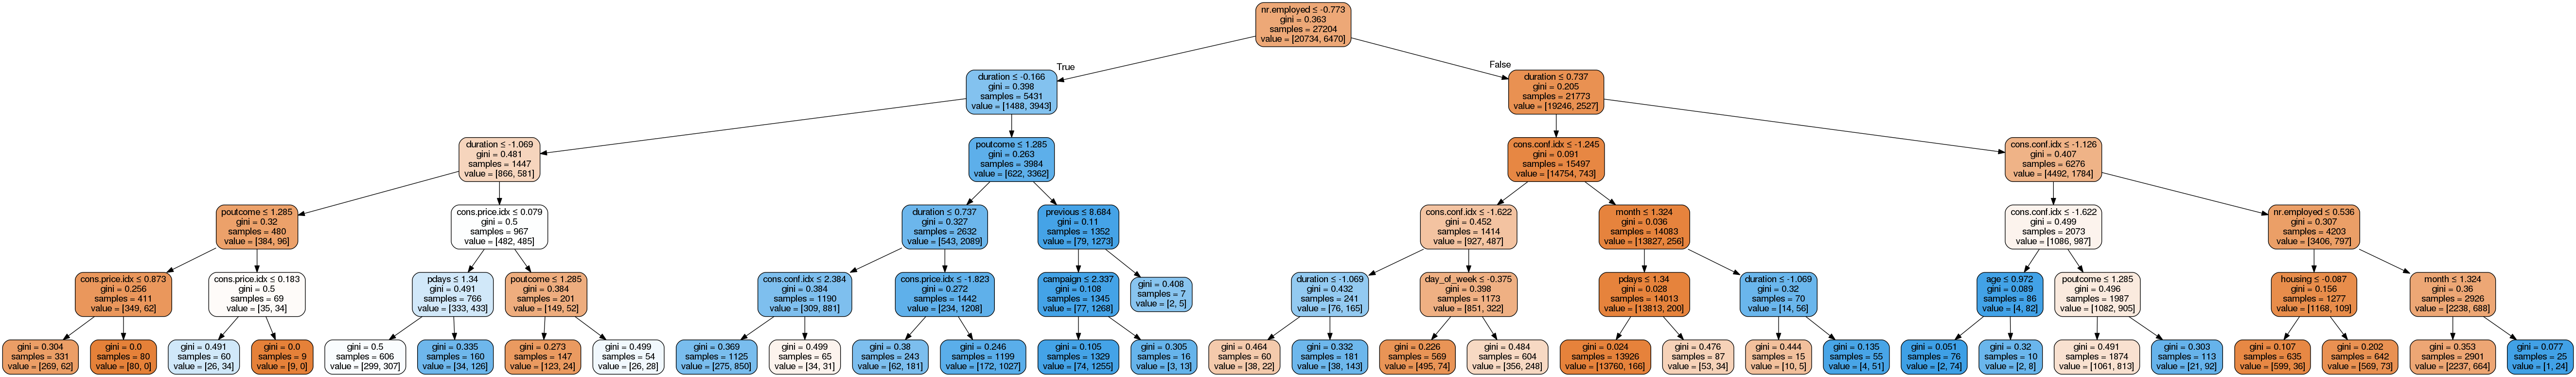

In [147]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank.png')
Image(graph.create_png())

##### RandomForestClassifier:
To better the Predictive outcomes of DecisionTree Algorithm

In [150]:
from sklearn.ensemble import RandomForestClassifier
radm_classifier = RandomForestClassifier(bootstrap = True, criterion = 'entropy', n_estimators = 50)
radm_classifier.fit(X_train, y_train)
y_predict = radm_classifier.predict(X_test)

Overall Acuracy:  0.9578044596912522
[[8454  396]
 [  96 2714]]
recall :  0.9658362989323843
Precision :  0.872668810289389
Cross Val Score:  0.9422142865296963


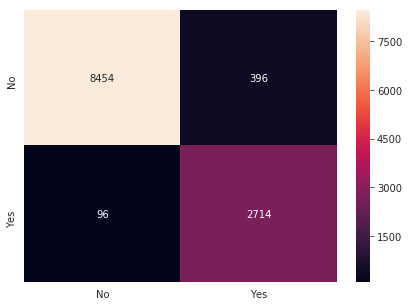

In [151]:
rad_score = radm_classifier.score(X_test, y_test)
print('Overall Acuracy: ', rad_score)

predicted_labels = radm_classifier.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted_labels))
cm = metrics.confusion_matrix(y_test, y_predict, labels = [0, 1])

radm_Recall = cm[1, 1]/(cm[1, 0] +cm[1, 1])
print('recall : ', radm_Recall)

radm_Precision = cm[1, 1]/(cm[0, 1] + cm[1, 1])
print('Precision : ', radm_Precision)

#Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models
radm_scores = cross_val_score(radm_classifier, X_train, y_train, cv = 3)
print('Cross Val Score: ', radm_scores.mean())

Random Forest Classifier overcomes the Problems with Decision Tree Classifier and achieves the accuracy of 95.78 % with an ability to predict 96% Class Yes values correctly. i.e. It can predict a new person if he's likely to take up the Term Deposit 96 times correcly out of 100

##### GradientBoosting Classifier:
GBTs build trees one at a time, where each new tree helps to correct errors made by previously trained tree. With each tree added, the model becomes even more expressive. 
There are typically three parameters - number of trees, depth of trees and learning rate, and the each tree built is generally shallow.



In [152]:
from sklearn.ensemble import GradientBoostingClassifier

In [207]:
grad_clf = GradientBoostingClassifier(n_estimators = 500, max_depth = 5)
grad_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [208]:
grad_score = grad_clf.score(X_test, y_test)
print('Overall Acuracy: ', rad_score)

predicted_labels = grad_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted_labels))
cm = metrics.confusion_matrix(y_test, y_predict, labels = [0, 1])

#df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                 # columns = [i for i in ["No","Yes"]])
#plt.figure(figsize = (7,5))
#sns.heatmap(df_cm, annot=True ,fmt='g')

grad_Recall = cm[1, 1]/(cm[1, 0] +cm[1, 1])
print('recall : ', grad_Recall)

grad_Precision = cm[1, 1]/(cm[0, 1] + cm[1, 1])
print('Precision : ', grad_Precision)

#Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv = 3)
print('Cross Val Score: ', grad_scores.mean())

Overall Acuracy:  0.9204116638078902
[[8393  457]
 [ 527 2283]]
recall :  0.9658362989323843
Precision :  0.872668810289389
Cross Val Score:  0.9106014138410853


Gradient Boosting Classifier shows better results than the Random Forest.

#### Voting Classifier: 
Building Model on combined Classifiers

In [156]:
# Our three classifiers are kNN, gradientBoosting,  and RandomForest
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('gbc', grad_clf), ('knn', knn ), ('Random Forest', radm_classifier)], voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

Overall Acuracy:  0.9588336192109777
[[8458  392]
 [  88 2722]]
recall :  0.9658362989323843
Precision :  0.872668810289389
Cross Val Score:  0.9421040491766072


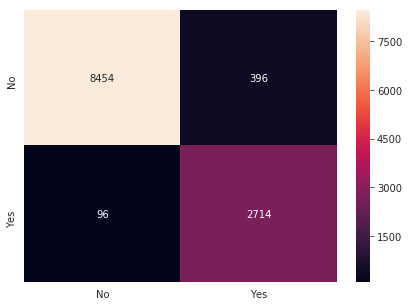

In [157]:
vot_score = voting_clf.score(X_test, y_test)
print('Overall Acuracy: ', vot_score)

predicted_labels = voting_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted_labels))
cm = metrics.confusion_matrix(y_test, y_predict, labels = [0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

voting_Recall = cm[1, 1]/(cm[1, 0] +cm[1, 1])
print('recall : ', voting_Recall)

voting_Precision = cm[1, 1]/(cm[0, 1] + cm[1, 1])
print('Precision : ', voting_Precision)

#Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models
voting_scores = cross_val_score(voting_clf, X_train, y_train, cv = 3)
print('Cross Val Score: ', voting_scores.mean())

In [210]:
Classifiers = ['kNN', 'Dec Tree', 'Random Forest', 'Gradient Boosting', 'Voting Classifier']
Precision = [kNN_Precision, DCT_Precision, radm_Precision, grad_Precision, voting_Precision]
Recall = [kNN_Recall, DCT_Recall, radm_Recall, grad_Recall, voting_Recall]

myData = {'Classifiers': Classifiers, 'Recall': Recall, 'Precision': Precision}

result_df = pd.DataFrame(myData)

print(result_df.sort_values(['Recall', 'Precision'], ascending=[False, False]))

         Classifiers    Recall  Precision
2      Random Forest  0.965836   0.872669
3  Gradient Boosting  0.965836   0.872669
4  Voting Classifier  0.965836   0.872669
0                kNN  0.837011   0.741956
1           Dec Tree  0.661566   0.796487


### Deliverable 4 (Tuning the Model)

##### Hypertuning: 
Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm where a hyperparameter is a parameter whose value is set before the learning process begins.
###### Tuning Strategies
Broadly there are two different methods for optimizing hyperparameters:
1. Grid Search
2. Random Search

I have used Grid Search on Gradient Boosting Algorithm 

###### Grid search is a traditional way to perform hyperparameter optimization. It works by searching exhaustively through a specified subset of hyperparameters.
###### Using sklearn’sGridSearchCV, we first define our grid of parameters to search over and then run the grid search.
###### The benefit of grid search is that it is guaranteed to find the optimal combination of parameters supplied. 


In [160]:
#Building GradientBoosting Model by implementing hyper parameter tuning
from sklearn.model_selection import GridSearchCV
p_test = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000]}
seed = 123
tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth = 4, 
                                                            min_samples_split = 2, 
                                                            min_samples_leaf = 1, 
                                                            subsample = 1,
                                                            max_features='sqrt', 
                                                            random_state = seed),
                                                            param_grid = p_test, 
                                                            scoring='accuracy',
                                                            cv=5)

###### Parameters Tuned:
1. max_depth = 4, 
2. min_samples_split = 2, 
3. min_samples_leaf = 1, 
4. subsample = 1,
5. max_features='sqrt' 
                      

In [163]:
# Fitting the Tuned Model
tuning.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...        subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001], 'n_estimators': [100, 250, 500, 750, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [179]:
predicted_labels = tuning.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted_labels))
cm = metrics.confusion_matrix(y_test, y_predict, labels = [0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])


gbTune_Recall = cm[1, 1]/(cm[1, 0] +cm[1, 1])
print('recall : ', gbTune_Recall)

gbTune_Precision = cm[1, 1]/(cm[0, 1] + cm[1, 1])
print('Precision : ', gbTune_Precision)




[[8401  449]
 [ 534 2276]]
recall :  0.9658362989323843
Precision :  0.872668810289389


###### Implementing Regularization on Random Forest Classifier:

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(radm_classifier)

In [191]:
# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [192]:
feat_labels = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']       
  
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

age
job
education
day_of_week
duration
campaign
emp.var.rate
euribor3m
nr.employed


In [193]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [194]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [196]:
# Apply The Full Featured Classifier To The Test Data
y_pred = radm_classifier.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.9578044596912522

In [197]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.9204116638078902

In [200]:
rad_score = clf_important.score(X_important_test, y_test)
print('Overall Acuracy: ', rad_score)

predicted_labels = clf_important.predict(X_important_test)
print(metrics.confusion_matrix(y_test, predicted_labels))
cm = metrics.confusion_matrix(y_test, y_predict, labels = [0, 1])

radm_Recall = cm[1, 1]/(cm[1, 0] +cm[1, 1])
print('recall : ', radm_Recall)

radm_Precision = cm[1, 1]/(cm[0, 1] + cm[1, 1])
print('Precision : ', radm_Precision)

Overall Acuracy:  0.9204116638078902
[[8238  612]
 [ 316 2494]]
recall :  0.9658362989323843
Precision :  0.872668810289389


### Conclusion: 
### Gradient Boosting classifier is the best model to predict whether or not a potential client will suscribe to a term deposit or not. 

#### Actions that need to be taken for better Results:

### Solutions for the Next Marketing Campaign:
 #### 1. Months of Marketing Activity: 
###### We saw that the the month of highest level of marketing activity was the month of May. . For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

#### 2. Seasonality: 
###### Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

#### 3. Campaign Calls:
###### A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.

#### 4. Age Category: 
###### The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions.

##### 5. Occupation: 
###### Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.

#### 6. Develop a Questionaire during the Calls: 
##### Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute.


#### 7. Target individuals with a higher duration (above 375): 
###### Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 78% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.


##### By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.
